<a href="https://colab.research.google.com/github/fresa-yz/Financial-Analytics-2020-Stock-Returns-Analysis/blob/main/Financial_Analytics__2020_Stock_Returns_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <h2><center> Project: Financial and Accouting Analytics of Stock Returns during Covid-19 Pandemic in 2020 </center></h2>

<h6><center> Ying Zhang </center></h6>

#### Introduction ####

The goal of this project is to gain some understanding of the stock market shock brought by Covid-19 pandemic and its recovery in the year of 2020 by analyzing a large set of U.S companies in different industries.

The project consists of the following parts of analysis:
* Part1: Average stock returns for each of the 4 types of industy classfications
* Part2: Industry fixed effect models
* Part3: Industry fixed effect models with financial ratios
* Part4: Large companies V.S Small companies stock market returns analysis 
* Part5: (additional)Texual analysis to predict High/Low stock return 


<br>

First, mount Google Drive and establish the working directory

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/gdrive/My Drive/financial_analytics/rawdata/"

# choose where you want your project files to be saved
project_folder = "CSV/"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/gdrive/My Drive/financial_analytics/rawdata/CSV/

An empty text file was created there. You can also run !pwd to confirm the current working directory.


Install and Load Libraries

In [ ]:
! pip install statutils

  Created wheel for statutils: filename=statutils-0.1.1-cp37-none-any.whl size=4414 sha256=389ada63f6ea1cead953ae9af8f916bc640950e2074ebb06689000f451bb0b33
  Stored in directory: /root/.cache/pip/wheels/53/5d/e1/8be98c1aa78b4409426caee88217a3a84084bcfbb3ae7ffd56
Successfully built statutils


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from statutils.multi_comparison import p_adjust

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Pre-process data (stage1)

<h4>Load, merge, and clean data </h4> <br>
Load the data from "temp1.csv" and "tempGICS.csv" into Pandas dataframes. Merge the datasets based on each stock's ticker symbol (TIC). Save the merged datasets in a file called "assign4.csv".

In [ ]:
temp1 = pd.read_csv('temp1.csv')
industry_codes= pd.read_csv('Industry_Codes.csv')
tempGICS = industry_codes[['tic','ggroup']]

In [ ]:
industry_codes.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,costat,ggroup,gsector,naics,sic
0,1004,20200531,2019.0,INDL,C,D,STD,AIR,USD,A,2010,20,423860,5080
1,1045,20191231,2019.0,INDL,C,D,STD,AAL,USD,A,2030,20,481111,4512
2,1050,20191231,2019.0,INDL,C,D,STD,CECE,USD,A,2020,20,333413,3564
3,1075,20191231,2019.0,INDL,C,D,STD,PNW,USD,A,5510,55,2211,4911
4,1076,20191231,2019.0,INDL,C,D,STD,PRG,USD,A,4020,40,522220,6141


Check the number of industries identified by GIC Groups, GIC Sectors, SIC and NACICS.

In [ ]:
print(len(industry_codes['ggroup'].unique()))
print(len(industry_codes['gsector'].unique()))
print(len(industry_codes['naics'].unique()))
print(len(industry_codes['sic'].unique()))

24
11
538
351


Merge data

In [ ]:
df_all= pd.merge(temp1, industry_codes,left_on='TICKER',right_on='tic')
df_all= df_all[['TICKER','RetEarly2020','RetLate2020','ggroup',	'gsector'	,'naics',	'sic']]
print(df_all.shape)
df_all.head()

(2666, 7)


,TICKER,RetEarly2020,RetLate2020,ggroup,gsector,naics,sic
0,WLL,-0.908665,-0.496924,1010,10,211120,1311
1,PVAC,-0.898188,2.284784,1010,10,2111,1311
2,SM,-0.891459,4.060018,1010,10,2111,1311
3,OVV,-0.880864,4.467902,1010,10,2111,1311
4,TELL,-0.875838,0.416084,1010,10,211120,1311


In [ ]:
df_all.to_csv("project_data.csv")

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 0 to 2665
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TICKER        2666 non-null   object 
 1   RetEarly2020  2666 non-null   float64
 2   RetLate2020   2666 non-null   float64
 3   ggroup        2666 non-null   int64  
 4   gsector       2666 non-null   int64  
 5   naics         2666 non-null   int64  
 6   sic           2666 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 166.6+ KB


In [ ]:
df_all.describe()[['RetEarly2020',	'RetLate2020']]

,RetEarly2020,RetLate2020
count,2666.000000,2666.000000
mean,-0.290915,0.804400
std,0.313196,1.074286
min,-0.908665,-0.858458
25%,-0.440401,0.252418
50%,-0.312152,0.547064
75%,-0.171201,1.000302
max,7.512067,18.993847


Check NA

In [ ]:
df_all.isna().sum()

TICKER          0
RetEarly2020    0
RetLate2020     0
ggroup          0
gsector         0
naics           0
sic             0
dtype: int64

##### Coding system that identifies 10-25 industries

* First, create Industry Indicator variables for the 24 Industry categories based on GICS GGROUP.<br><br>

* Similarly, we will create Industry Indicator variables for the 11 Industry categories based on GICS Sector.<br><br>

* For SIC (Standard Industry Code), we will create 12 categories based on the Farma French 12 industry.<br><br>

* For NAICS  ((North America Industry Classification Codes)), we will create 18 categories based on the NAICS main groups. <br>
reference: https://www.naics.com/search/

In order to gain more insights from the industy fixed effect statistical models, we map the industy codes with thier respective industries names.

In [ ]:
ggroup_dic = {'1010':'Energy','1510':'Materials','2010':'Capital Goods','2020':'Commercial & Professional Services','2030':'Transportation','2510':'Automobiles & Components','2520':'Consumer Durables & Apparel',
'2530':'Consumer Services','2540':'Media','2550':'Retailing','3010':'Food & Staples Retailing',	'3020':'Food, Beverage & Tobacco','51':'Information','3030':'Household & Personal Products',
'3510':'Health Care Equipment & Services','3520':'Pharmaceuticals, Biotechnology & Life Sciences','4010':'Banks','4020':'Diversified Financials',
'4030':'Insurance','4510':'Software & Services','4520':'Technology Hardware & Equipment','4530':'Semiconductors & Semiconductor Equipment','5010':'Telecommunication Services','5020':'Media & Entertainment',
'5510':'Utilities','6010':'Real Estate'}

Gsector_dic = {'10':'Energy','15':'Materials','20':'Industrials','25':'Consumer Discretionary','30':'Consumer Staples','35':'Health Care','40':'Financials',
'45':'Information Technology','50':'Communication Services','55':'Utilities','60':'Real Estate'}

Naics_dic = {'11':'Agriculture, Forestry, Fishing and Hunting','21':'Mining','22':'Utilities','23':'Construction','31':'Manufacturing','32':'Manufacturing','33':'Manufacturing',
'42':'Wholesale Trade','44':'Retail Trade','45':'Retail Trade','48':'Transportation and Warehousing',	'49':'Transportation and Warehousing','51':'Information','52':'Finance and Insurance',
'53':'Real Estate Rental and Leasing','54':'Professional, Scientific, and Technical Services','55':'Management of Companies and Enterprises','56':'Administrative and Support and Waste Management and Remediation Services',
'61':'Educational Services','62':'Health Care and Social Assistance','71':'Arts, Entertainment, and Recreation','72':'Arts, Entertainment, and Recreation','81':'Other Services (except Public Administration)',
'92':'Public Administration','99':'Other'}


In [ ]:
def set_value(row_number, assigned_value):
    return assigned_value[row_number]

In [ ]:
GGroup_df = df_all[['TICKER',	'RetEarly2020',	'RetLate2020','ggroup']]
GGroup_df['ggroup']= GGroup_df['ggroup'].astype('str')
GGroup_df['GGROUP']=GGroup_df['ggroup'].apply(set_value,args=(ggroup_dic,))

Gsector_df = df_all[['TICKER',	'RetEarly2020',	'RetLate2020','gsector']]
Gsector_df['gsector']= Gsector_df['gsector'].astype('str')
Gsector_df['Gsector']=Gsector_df['gsector'].apply(set_value,args=(Gsector_dic,))

NACIS_df = df_all[['TICKER',	'RetEarly2020',	'RetLate2020','naics']]
NACIS_df['code_category']=  NACIS_df.naics.astype(str).str[:2]
NACIS_df['naics']=NACIS_df['code_category'].apply(set_value,args=(Naics_dic,))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Note: For the NAICS codes, we can see that the following two companies that have operated across industies, and thus belongs to the code"99", so we map these two companies to category "other". 

* SEC: Seaboard Corporation, belongs to agriculture and transportation. <br>
* GE: General Electric Company operates through the following segments: aviation, healthcare, power, renewable energy, digital industry, additive manufacturing and venture capital and finance. 

In [ ]:
NACIS_df[NACIS_df['code_category']=='99']

,TICKER,RetEarly2020,RetLate2020,naics,code_category
1201,SEB,-0.337815,0.080062,Other,99
1462,GE,-0.287634,0.365641,Other,99


Map the SIC codes with industry group names

In [ ]:
SIC_df = df_all[['TICKER',	'RetEarly2020',	'RetLate2020','sic']]
SIC_df['SIC']='NaN'
SIC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 0 to 2665
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TICKER        2666 non-null   object 
 1   RetEarly2020  2666 non-null   float64
 2   RetLate2020   2666 non-null   float64
 3   sic           2666 non-null   int64  
 4   SIC           2666 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 125.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Load the pre-proecessed farma french 12 industry dataset

In [ ]:
SIC= pd.read_csv("SIC.csv")
SIC.Industry.unique()

array(['enrgy', 'manuf', 'shops', 'utils', 'others', 'money', 'durbl',
       'nodur', 'hlth', 'buseq', 'chems', 'telcm'], dtype=object)

In [ ]:
SIC[SIC.Industry=='others'].shape

(281, 5)

In [ ]:
def transform_sic(x):
  if x=='enrgy':
    return 'Energy'
  
  if x=='manuf':
    return 'Manufacturing'
  
  if x=='shops':
    return 'Wholesale, Retail, and Some Services'
  
  if x=='utils':
    return 'Utilities'
  
  if x=='money':
    return 'Finance'
  
  if x =='durbl':
    return 'Consumer Durables'

  if x=='nodur':
    return 'Consumer Nondurables'

  if x=='hlth':
    return 'Healthcare,Medical Equipment,and Drugs'
  
  if x=='buseq':
    return 'Business Equipment'

  if x=='chems':
    return 'Chemicals & Allied Products'
  
  if x =='telcm':
    return 'Telephone & Television Transmission'
  
  if x=='others':
    return 'Others'
  


In [ ]:
SIC['SIC']= SIC['Industry'].apply(lambda x: transform_sic(x))
SIC_df = SIC[['TICKER',	'RetEarly2020',	'RetLate2020','sic','SIC']]
SIC_df.sample(5)

,TICKER,RetEarly2020,RetLate2020,sic,SIC
2387,XEL,-0.043471,0.127407,4931,Utilities
2579,PLUG,0.120253,8.579099,3674,Business Equipment
1956,JOUT,-0.180762,0.808633,3690,Business Equipment
1746,UHAL,-0.226891,0.571503,7510,Others
1709,ADM,-0.233734,0.468213,2070,Consumer Nondurables


Check the number of categories within each of the four industry codes

In [ ]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [ ]:
print(len(GGroup_df['GGROUP'].unique()))
print(len(Gsector_df['Gsector'].unique()))
print(len(SIC_df['SIC'].unique()))
print(len(NACIS_df['naics'].unique()))

24
11
12
18


Check how many companies under each categories using 4 types of industry codes.<br>
Excepct for some categories that consist of only a few companies, the majority of the categories have a decent number of companies.

In [ ]:
tab1=GGroup_df.groupby('GGROUP')[['TICKER']].count()
tab2=Gsector_df.groupby('Gsector')[['TICKER']].count()
tab3=SIC_df.groupby('SIC')[['TICKER']].count()
tab4=NACIS_df.groupby('naics')[['TICKER']].count()

display_side_by_side([tab1,tab2,tab3,tab4],['GGROUP','Gsector','SIC','naics'])

,TICKER
GGROUP,
Automobiles & Components,29
Banks,296
Capital Goods,232
Commercial & Professional Services,83
Consumer Durables & Apparel,82
Consumer Services,89
Diversified Financials,124
Energy,104
Food & Staples Retailing,22


Create ***dummy variables*** for the industries indicator variables using 4 different types of industy codes respectively

In [ ]:
df_GGROUP = pd.get_dummies(GGroup_df, columns=['GGROUP'])
df_GSECTOR = pd.get_dummies(Gsector_df, columns=['Gsector'])
df_NACIS = pd.get_dummies(NACIS_df, columns=['naics'])
df_SIC = pd.get_dummies(SIC_df, columns=['SIC'])


Have a look at the 4 dataframes containing using 4 different types industry codes

In [ ]:
df_GGROUP.head()

,TICKER,RetEarly2020,RetLate2020,ggroup,GGROUP_Automobiles & Components,GGROUP_Banks,GGROUP_Capital Goods,GGROUP_Commercial & Professional Services,GGROUP_Consumer Durables & Apparel,GGROUP_Consumer Services,GGROUP_Diversified Financials,GGROUP_Energy,GGROUP_Food & Staples Retailing,"GGROUP_Food, Beverage & Tobacco",GGROUP_Health Care Equipment & Services,GGROUP_Household & Personal Products,GGROUP_Insurance,GGROUP_Materials,GGROUP_Media & Entertainment,"GGROUP_Pharmaceuticals, Biotechnology & Life Sciences",GGROUP_Real Estate,GGROUP_Retailing,GGROUP_Semiconductors & Semiconductor Equipment,GGROUP_Software & Services,GGROUP_Technology Hardware & Equipment,GGROUP_Telecommunication Services,GGROUP_Transportation,GGROUP_Utilities
0,WLL,-0.908665,-0.496924,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PVAC,-0.898188,2.284784,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SM,-0.891459,4.060018,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,OVV,-0.880864,4.467902,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TELL,-0.875838,0.416084,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_GSECTOR.head()

,TICKER,RetEarly2020,RetLate2020,gsector,Gsector_Communication Services,Gsector_Consumer Discretionary,Gsector_Consumer Staples,Gsector_Energy,Gsector_Financials,Gsector_Health Care,Gsector_Industrials,Gsector_Information Technology,Gsector_Materials,Gsector_Real Estate,Gsector_Utilities
0,WLL,-0.908665,-0.496924,10,0,0,0,1,0,0,0,0,0,0,0
1,PVAC,-0.898188,2.284784,10,0,0,0,1,0,0,0,0,0,0,0
2,SM,-0.891459,4.060018,10,0,0,0,1,0,0,0,0,0,0,0
3,OVV,-0.880864,4.467902,10,0,0,0,1,0,0,0,0,0,0,0
4,TELL,-0.875838,0.416084,10,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_SIC.head()

,TICKER,RetEarly2020,RetLate2020,sic,SIC_Business Equipment,SIC_Chemicals & Allied Products,SIC_Consumer Durables,SIC_Consumer Nondurables,SIC_Energy,SIC_Finance,"SIC_Healthcare,Medical Equipment,and Drugs",SIC_Manufacturing,SIC_Others,SIC_Telephone & Television Transmission,SIC_Utilities,"SIC_Wholesale, Retail, and Some Services"
0,WLL,-0.908665,-0.496924,1311,0,0,0,0,1,0,0,0,0,0,0,0
1,PVAC,-0.898188,2.284784,1311,0,0,0,0,1,0,0,0,0,0,0,0
2,SM,-0.891459,4.060018,1311,0,0,0,0,1,0,0,0,0,0,0,0
3,OVV,-0.880864,4.467902,1311,0,0,0,0,1,0,0,0,0,0,0,0
4,TELL,-0.875838,0.416084,1311,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_NACIS.head()

,TICKER,RetEarly2020,RetLate2020,code_category,naics_Administrative and Support and Waste Management and Remediation Services,"naics_Agriculture, Forestry, Fishing and Hunting","naics_Arts, Entertainment, and Recreation",naics_Construction,naics_Educational Services,naics_Finance and Insurance,naics_Health Care and Social Assistance,naics_Information,naics_Manufacturing,naics_Mining,naics_Other,naics_Other Services (except Public Administration),"naics_Professional, Scientific, and Technical Services",naics_Real Estate Rental and Leasing,naics_Retail Trade,naics_Transportation and Warehousing,naics_Utilities,naics_Wholesale Trade
0,WLL,-0.908665,-0.496924,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,PVAC,-0.898188,2.284784,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,SM,-0.891459,4.060018,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,OVV,-0.880864,4.467902,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,TELL,-0.875838,0.416084,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### PART1: Average stock returns for each industry classfications

Q1.	What are the average stock returns for each industry classification?

To answer this quesitons, we aggregate the data by industry, caculate the average stock returns for early2020 and late2020, and sort the data from largest to smallest.

The following RetEartly2020 values are the averge stock returns for each industry.

##### ReturnEarly2020

In [ ]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [ ]:
table1= GGroup_df.groupby("GGROUP").mean()[['RetEarly2020']].sort_values(by='RetEarly2020',ascending= False)
table2= Gsector_df.groupby("Gsector").mean()[['RetEarly2020']].sort_values(by='RetEarly2020',ascending= False)
table3= SIC_df.groupby("SIC").mean()[['RetEarly2020']].sort_values(by='RetEarly2020',ascending= False)
table4= NACIS_df.groupby("naics").mean()[['RetEarly2020']].sort_values(by='RetEarly2020',ascending= False)

Compare the GIC GROUPS result with SIC and  naics codes results

In [ ]:
display_side_by_side([table1, table3,table4], ['GGROUP', 'SIC','naics'])

,RetEarly2020
GGROUP,
Telecommunication Services,-0.089193
Health Care Equipment & Services,-0.134281
"Pharmaceuticals, Biotechnology & Life Sciences",-0.141030
Utilities,-0.147903
Food & Staples Retailing,-0.175851
Software & Services,-0.177201
"Food, Beverage & Tobacco",-0.181004
Semiconductors & Semiconductor Equipment,-0.226510
Household & Personal Products,-0.231034


Compare the GIC Sector result with SIC and  naics codes results

In [ ]:
display_side_by_side([table2, table3,table4], ['Gsector', 'SIC','naics'])

,RetEarly2020
Gsector,
Health Care,-0.138597
Utilities,-0.147903
Consumer Staples,-0.191263
Information Technology,-0.216691
Communication Services,-0.288301
Industrials,-0.321806
Real Estate,-0.328122
Financials,-0.346446
Materials,-0.350917


###### Businss insight

Q: Do the highest and lowest return industries make economic sense for early  2020?

*  In the early 2020:
 *   According to ```GIC GROUPS```, the industry with the highest return is **Telecommunication Services**
  *   According to ```GIC Sector```, the industry with the highest return is **Health Care**
  *   According to ```SIC```, the industry with the highest return is **Healthcare,Medical Equipment,and Drugs**
  *   According to ```naics```, the industry with the highest return is **Utilities** <br><br>


   Interpretation:

  In the early 2020, all industries suffered negative 3-months average returns,and one major reason is that covid-19 became a public concern as early as January and February and was declared a pandemic in March.<br><br>

  Among all the industries, the ones with the highest return are different when using different industry identifiers. This is because of their different ways of classifying companies. However, it's clearly that no matter which identifiers we use, ```Health care```, ```utilties``` ,and ```telecommunications``` are on top of the rankings, suggesting these industies were less affected by stock market shock in the early 2020.<br><br>

* Telecommunication services <br><br>
<p align = 'justify'> This makes sense because the telecommunication services is one of the sectors that are least affected by the pandemic resctricitons and have benefitted from the increased traffic of data. Thus, investors will have more confidence in the prospect of this sector when the covid pandemic started to spread across countries in the early 2020.<br>   
<p align = 'justify'>Further evidence: According to the the report of COVID-19’s Impact on the Global Telecommunications Industry, the industry exempted from major COVID-19-related restrictions, such as stay-at-home orders and quarantine requirements. Some telecom companies have been strengthened by the short-term spike in data traffic and increased use of broadband services, as more people are working from home and rely on video conferencing to hold meetings.<br><br>

* Heathcare & Pharmaceuticals <br><br>
 Industries such as healthcare, medical, and pharmaceuticals exhibit less exposure to  COVID-19 in terms of stock market returns. This makse sense because during the pandemic,the demand for healthcare and pharamceuticals increase significantly. And the pursuit of vaccines had been the focus in the 2020.Thus, investors would have more confidence in the healthcare and Pharmaceuticals industries. <br><br>


* Utilties <br><br>
<p align = 'justify'> Utilities industies didn't not seem to be hard hit as much as many other industies in the early2020. Utilties industy cosists of five sub-categories, which are Electric Utilities, Gas Utilities, Multi-Utilities, Water Utilities, and Independent Power and Renewable Electricity Producers. The demand for utilties has remain stable in either the work-from-home enviorment and regurlar business enviorment. Thus, it makes sense that utlities had less decrease in return. <br> 

-----------------------------------------------------------------------------

*  In the early 2020:
 *   According to ```GIC GROUPS```, the industry with the lowest return is **Energy**
  *   According to ```GIC Sector```, the industry with the lowes return is **Energy**
  *   According to ```SIC```, the industry with the lowes return is **Energy**
  *   According to ```naics```, the industry with the lowes return is **Mining** <br><br>


   Among all the industry gouros, the lowest return industry are **Energy**, indicated by GIC groups, GIC sector and SIC sector. Naics seems to have a very different classifiction where energy sector is included in other main groups.It's clearly that investor expected ```Energy``` industry would be dramatically hard hit by the pandemic in the early 2020.<br><br>

   This finding aligns with the market news in the early half of the 2020 that covid-19 pandemic lockdowns have led to biggest fall in enery demand in 70 years. Energy industy consists of two sub-industies- 1)Energy Equipment & Services  and 2)Oil, Gas & Consumable Fuels. Due to the restrictions on economic activities, many small& medium sized business closed down. Also, the related industries including Airlines, Travel were impacted by the pandemic, thus the demand for energy decliend significantly, which will result in a dramatic drop in stock returns for energy sector companies.

##### ReturnLate2020

In [ ]:
table1= GGroup_df.groupby("GGROUP").mean()[['RetLate2020']].sort_values(by='RetLate2020',ascending= False)
table2= Gsector_df.groupby("Gsector").mean()[['RetLate2020']].sort_values(by='RetLate2020',ascending= False)
table3= SIC_df.groupby("SIC").mean()[['RetLate2020']].sort_values(by='RetLate2020',ascending= False)
table4= NACIS_df.groupby("naics").mean()[['RetLate2020']].sort_values(by='RetLate2020',ascending= False)

In [ ]:
display_side_by_side([table1, table3,table4], ['GGROUP', 'SIC','naics'])

,RetLate2020
GGROUP,
Automobiles & Components,1.811358
Retailing,1.780307
Consumer Durables & Apparel,1.594357
Semiconductors & Semiconductor Equipment,1.218551
Consumer Services,1.131115
Software & Services,1.027021
Energy,1.017517
Capital Goods,0.898123
Materials,0.873224


In [ ]:
display_side_by_side([table2, table3,table4], ['Gsector', 'SIC','naics'])

,RetLate2020
Gsector,
Consumer Discretionary,1.541481
Energy,1.017517
Information Technology,1.004655
Materials,0.873224
Industrials,0.805244
Communication Services,0.777949
Health Care,0.739742
Consumer Staples,0.524287
Financials,0.497959


###### Business insight

Q: Do the highest and lowest return industries make economic sense for late 2020?<br><br>

Interprtation<br><br>
<p align = 'justify'>  In the late 2020 (from April to December), all industries investigated in our studies had seen postive average 9-months returns in the stock market, climbing our from the pit. The market's recovery has been in stark contrast to the economy downturn resulted from the ongoing pandemic. But it also reflected that the investors expected strong growth after goverment's repsoneses,  distributions of vaccines and the reopening of businesses. <br><br>


*  In the late 2020:
 *   According to ```GIC GROUPS```, the industry with the highest return is **Automobiles & Components**
  *   According to ```GIC Sector```, the industry with the highest return is **Consumer Discretionary**
  *   According to ```SIC```, the industry with the highest return is **Consumer Durables**
  *   According to ```naics```, the industry with the highest return is **Retail Trade**  <br><br>


<p align = 'justify'>
Digging into the defintions of the above industries, we realized that Consumer Discretionary, Consumer Durables and Retail Trade industires, which identified by differnet types of code, all contain car and automobile related sub-industries. For example,  Consumer Durables consists of Cars, TVs, Furniture, Household Appliances. 	Automobile Dealers, Automotive Parts, Accessories, and Tire Stores Retail Trade are inlcuded in retail Trade. 

* Automobiles & Components <br><br>
<p align = 'justify'> Automobiles & Components's stocks recovered very well in the late 2020. This makes sense becuase Automobiles & Components industry had suffered from a significant drop in market returns in the early 2020, and it had bounced back along with investors' confidence in the future market and with the reduced costs of the auto component suppliers. Besides, the demand of automibles remains due to people's need to keep social-distancing and avoid public transportation and air travel. Car sales were rising from the low point and dealer inventories were lowering, which drive investors' expecation for the future sales in 2021.<br>  

reference source : <html>https://www.barrons.com/articles/3-reasons-car-parts-stocks-can-keep-beating-the-market-51604695622<html>
<br><br>   

------------------------------------------------------------------------------
*  In the late 2020:
 *   According to ```GIC GROUPS```, the industry with the lowest return is **Utilities**
  *   According to ```GIC Sector```, the industry with the lowest return is **Utilities**
  *   According to ```SIC```, the industry with the lowest return is **Utilities**
  *   According to ```naics```, the industry with the lowest return are ```Utilties```and ```Agriculture, Forestry, Fishing and Hunting```  
  <br>

   * Utilities <br>
<p align = 'justify'> Utilities industies didn't not seem to be hard hit as much as many other industies in the early2020, with its makert returns being the top4 highest among all. Thus it makes sense that in the late 2020, the sector did not witness a significant recovery in the rerurns as other industries did. Utilties industy cosists of five sub-categories, which are Electric Utilities, Gas Utilities, Multi-Utilities, Water Utilities, and Independent Power and Renewable Electricity Producers. The demand for utilties has remain stable in either the work-from-home enviorment and regurlar business enviorment. The small amount of returns growth reflected that the investors did not seem to expect there would be a significant growth in the utilties market, which makes sense considering the nature of the sector and the fact that a lack of break through in the Renewable Electricity Producers sector in 2020.<br><br>


  * Mining <br>
<p align = 'justify'> The metals and mining industry was among the hardest hit on the financial markets. This is because during the covid pandemic, sites had been shutting down and operations had temporarily halted, which led to an significant prodcut loss. <br>
reference source: <br>
<html>https://www.mckinsey.com/industries/metals-and-mining/our-insights/how-procurement-leaders-can-bring-metals-and-mining-up-to-speed<html>




Let's look the visualizations below to gain an understanding of the stock performance of each industies.

<h4> GIC Groups </h4>

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 7 Text major ticklabel objects>)

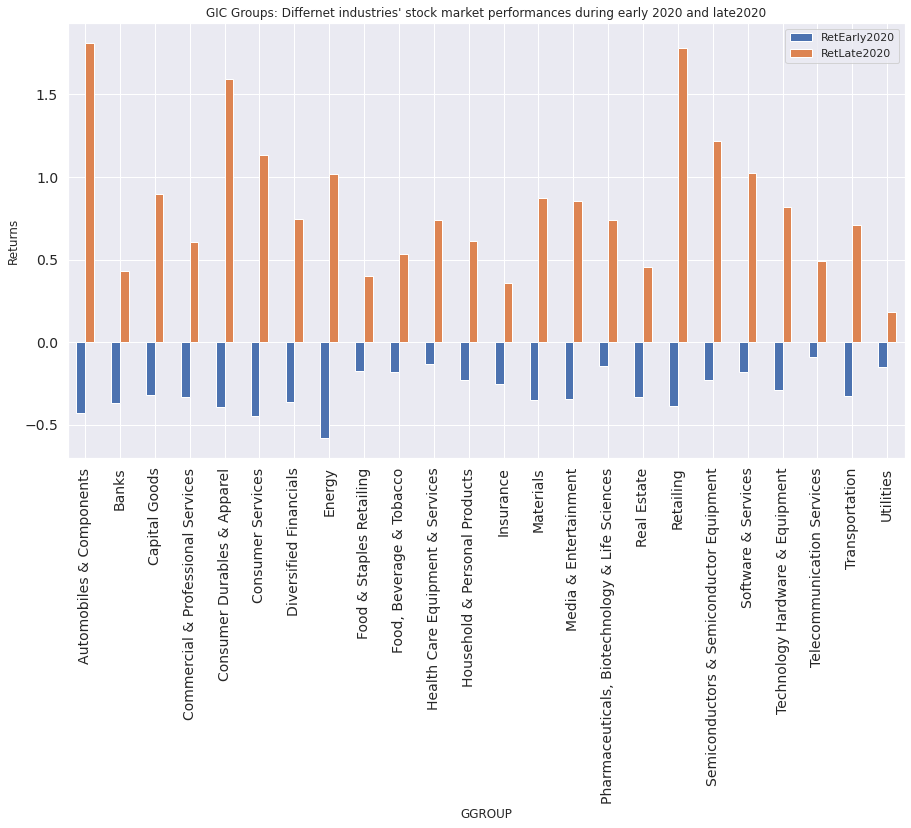

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})

vis1=GGroup_df.groupby("GGROUP").mean()[['RetEarly2020','RetLate2020']]
vis1.plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("GIC Groups: Differnet industries' stock market performances during early 2020 and late2020")
plt.ylabel("Returns")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


<h4> GIC Sectors </h4>

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 7 Text major ticklabel objects>)

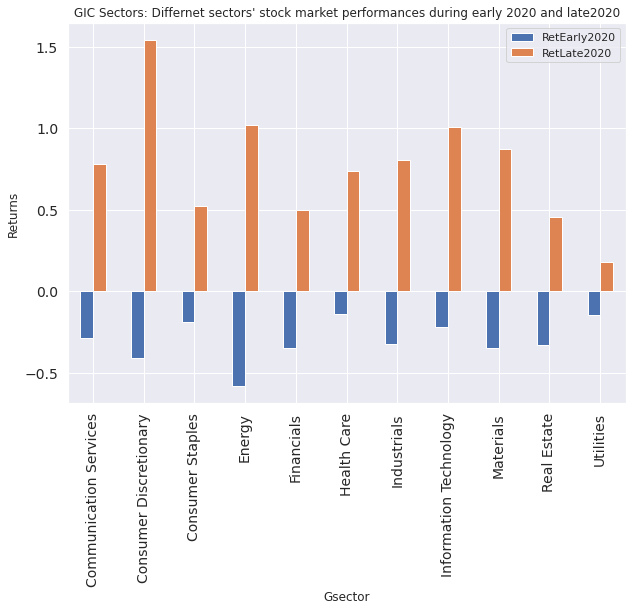

In [ ]:

%matplotlib inline
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(10,7)})

vis1=Gsector_df.groupby("Gsector").mean()[['RetEarly2020','RetLate2020']]
vis1.plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("GIC Sectors: Differnet sectors' stock market performances during early 2020 and late2020")
plt.ylabel("Returns")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


<h4> SIC </h4>

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 7 Text major ticklabel objects>)

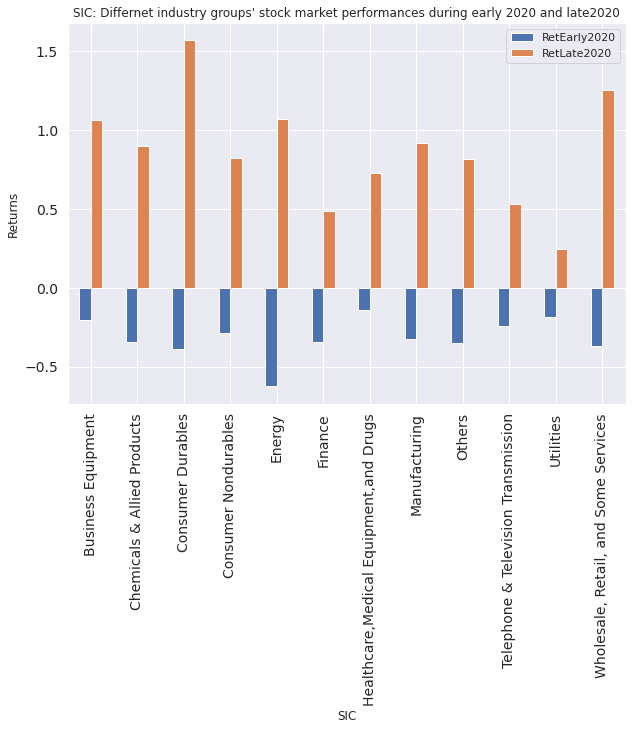

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(10,7)})

vis1=SIC_df.groupby("SIC").mean()[['RetEarly2020','RetLate2020']]
vis1.plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("SIC: Differnet industry groups' stock market performances during early 2020 and late2020")
plt.ylabel("Returns")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

<h4> NAICS </h4>

(array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 7 Text major ticklabel objects>)

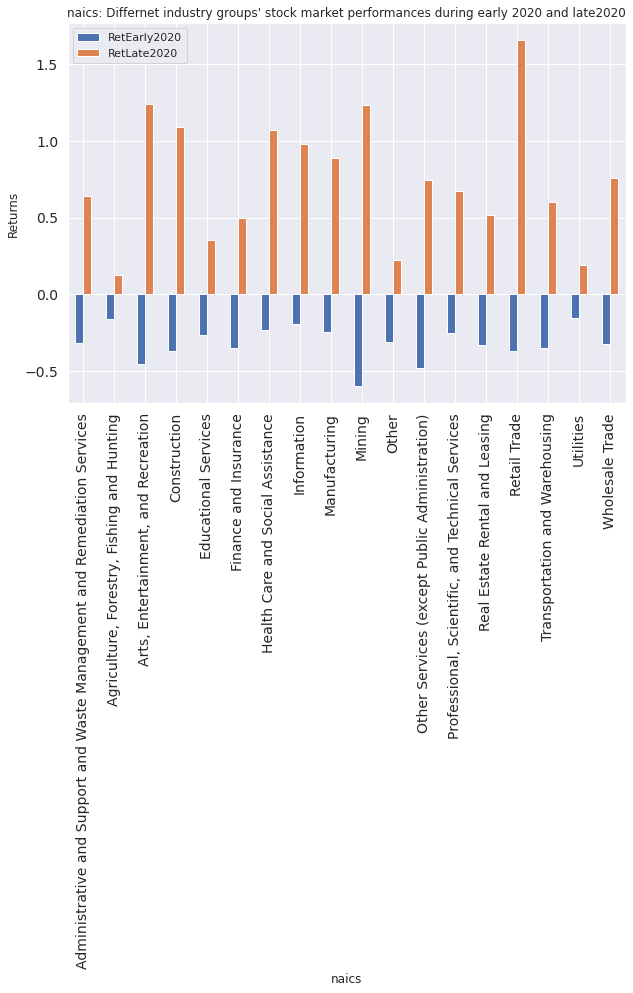

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
sns.set(rc={'figure.figsize':(10,7)})

vis1=NACIS_df.groupby("naics").mean()[['RetEarly2020','RetLate2020']]
vis1.plot(kind='bar')
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("naics: Differnet industry groups' stock market performances during early 2020 and late2020")
plt.ylabel("Returns")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#### Visualization Insights 



*   Some industries had witness signifcant decline in the early 2020 but then recovered farily well in the late 2020, such as ```Automobiles```,```Energy```and ```Mining```.

*   Some industries were not severly hard hit by the covid-19 in the early 2020 and its stock performance was fairly good in teh late 2020, such as ```Health Care```and  ```information Technology```.




### Part2: Industry fixed effects models

Run fixed effect regressions (using industry fixed effects) to explain both ReturnEarly2020 and ReturnLate2020:

#### Based on GIC Groups      (Most Recommended)

##### RetEarly2020

In [ ]:
df_GGROUP.head()

,TICKER,RetEarly2020,RetLate2020,ggroup,GGROUP_Automobiles & Components,GGROUP_Banks,GGROUP_Capital Goods,GGROUP_Commercial & Professional Services,GGROUP_Consumer Durables & Apparel,GGROUP_Consumer Services,GGROUP_Diversified Financials,GGROUP_Energy,GGROUP_Food & Staples Retailing,"GGROUP_Food, Beverage & Tobacco",GGROUP_Health Care Equipment & Services,GGROUP_Household & Personal Products,GGROUP_Insurance,GGROUP_Materials,GGROUP_Media & Entertainment,"GGROUP_Pharmaceuticals, Biotechnology & Life Sciences",GGROUP_Real Estate,GGROUP_Retailing,GGROUP_Semiconductors & Semiconductor Equipment,GGROUP_Software & Services,GGROUP_Technology Hardware & Equipment,GGROUP_Telecommunication Services,GGROUP_Transportation,GGROUP_Utilities
0,WLL,-0.908665,-0.496924,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PVAC,-0.898188,2.284784,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SM,-0.891459,4.060018,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,OVV,-0.880864,4.467902,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TELL,-0.875838,0.416084,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Predict" RetEarly2020"

x = df_GGROUP.drop(columns=['TICKER','RetEarly2020','RetLate2020','ggroup'])
y = df_GGROUP	['RetEarly2020']
model00=sm.OLS(y, x)
result00=model00.fit()
result00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RetEarly2020   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     17.25
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.59e-64
Time:                        22:53:44   Log-Likelihood:                -500.90
No. Observations:                2666   AIC:                             1050.
Df Residuals:                    2642   BIC:                             1191.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
GGROUP_Automobiles & Components                          -0.4295      0.054     -7.885      0.000      -0.536      -0.323
GGROUP_Banks                                             -0.3685      0.017    -21.614      0.000      -0.402      -0.335
GGROUP_Capital Goods                                     -0.3169      0.019    -16.457      0.000      -0.355      -0.279
GGROUP_Commercial & Professional Services                -0.3325      0.032    -10.328      0.000      -0.396      -0.269
GGROUP_Consumer Durables & Apparel                       -0.3915      0.032    -12.087      0.000      -0.455      -0.328
GGROUP_Consumer Services                                 -0.4482      0.031    -14.417      0.000      -0.509      -0.387
GGROUP_Diversified Financials                            -0.3596      0.026    -13.650      0.000      -0.411      -0.308
GGROUP_Energy                                            -0.5807      0.029    -20.192      0.000      -0.637      -0.524
GGROUP_Food & Staples Retailing                          -0.1759      0.063     -2.812      0.005      -0.298      -0.053
GGROUP_Food, Beverage & Tobacco                          -0.1810      0.038     -4.780      0.000      -0.255      -0.107
GGROUP_Health Care Equipment & Services                  -0.1343      0.022     -6.022      0.000      -0.178      -0.091
GGROUP_Household & Personal Products                     -0.2310      0.060     -3.859      0.000      -0.348      -0.114
GGROUP_Insurance                                         -0.2495      0.032     -7.795      0.000      -0.312      -0.187
GGROUP_Materials                                         -0.3509      0.027    -13.161      0.000      -0.403      -0.299
GGROUP_Media & Entertainment                             -0.3414      0.034    -10.080      0.000      -0.408      -0.275
GGROUP_Pharmaceuticals, Biotechnology & Life Sciences    -0.1410      0.017     -8.425      0.000      -0.174      -0.108
GGROUP_Real Estate                                       -0.3281      0.022    -14.841      0.000      -0.371      -0.285
GGROUP_Retailing                                         -0.3854      0.029    -13.269      0.000      -0.442      -0.328
GGROUP_Semiconductors & Semiconductor Equipment          -0.2265      0.037     -6.081      0.000      -0.300      -0.153
GGROUP_Software & Services                               -0.1772      0.021     -8.262      0.000      -0.219      -0.135
GGROUP_Technology Hardware & Equipment                   -0.2896      0.030     -9.520      0.000      -0.349      -0.230
GGROUP_Telecommunication Services                        -0.0892      0.066     -1.360      0.174      -0.218       0.039
GGROUP_Transportation            

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= result00.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
GGROUP_Banks,0.00000000,0.00000000,significant,significant
GGROUP_Energy,0.00000000,0.00000000,significant,significant
GGROUP_Capital Goods,0.00000000,0.00000000,significant,significant
GGROUP_Real Estate,0.00000000,0.00000000,significant,significant
GGROUP_Consumer Services,0.00000000,0.00000000,significant,significant
GGROUP_Diversified Financials,0.00000000,0.00000000,significant,significant
GGROUP_Retailing,0.00000000,0.00000000,significant,significant
GGROUP_Materials,0.00000000,0.00000000,significant,significant
GGROUP_Consumer Durables & Apparel,0.00000000,0.00000000,significant,significant
GGROUP_Commercial & Professional Services,0.00000000,0.00000000,significant,significant


In [ ]:
result00.params.sort_values(ascending=False)

GGROUP_Telecommunication Services                       -0.08919313
GGROUP_Health Care Equipment & Services                 -0.13428136
GGROUP_Pharmaceuticals, Biotechnology & Life Sciences   -0.14102953
GGROUP_Utilities                                        -0.14790277
GGROUP_Food & Staples Retailing                         -0.17585137
GGROUP_Software & Services                              -0.17720116
GGROUP_Food, Beverage & Tobacco                         -0.18100449
GGROUP_Semiconductors & Semiconductor Equipment         -0.22650992
GGROUP_Household & Personal Products                    -0.23103450
GGROUP_Insurance                                        -0.24947054
GGROUP_Technology Hardware & Equipment                  -0.28955023
GGROUP_Capital Goods                                    -0.31691012
GGROUP_Transportation                                   -0.32655553
GGROUP_Real Estate                                      -0.32812204
GGROUP_Commercial & Professional Services       

Interpreation

```For RetEarly2020:```

* This model has an adjusted R^2 of 0.123, meaning 12.3% of the variations in the early2020's stock return can be explained by the GIC groups industies. 

*  When we adjusted the p-value based on holm's method, most of the industries variables are significant except Telecommunication Services. <br>  

*  The coefficients of the GIC group industry variables represent the  respective industy's average stock return. All the industy suffered negative average return in early 2020. But some industries have relatively much better performances than many of the others. For example, the coefficient for GGROUP_Health Care Equipment & Services is -0.13428136, which means the average return for  ```Health Care Equipment & Services```industry is -13.4%  Some industies were performing worse than their counterparts, such as ```Energy``` industry. Its coefficient is  -0.58074514, meaning that its average return was -58%.<br><br> 



#####   RetLate2020

In [ ]:
# Predict" RetLate2020"
x = df_GGROUP.drop(columns=['TICKER','RetEarly2020','RetLate2020','ggroup'])
y = df_GGROUP	['RetLate2020']
model01=sm.OLS(y, x)
result01=model01.fit()
result01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RetLate2020   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     14.14
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.16e-51
Time:                        22:53:44   Log-Likelihood:                -3818.7
No. Observations:                2666   AIC:                             7685.
Df Residuals:                    2642   BIC:                             7827.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
GGROUP_Automobiles & Components                           1.8114      0.189      9.581      0.000       1.441       2.182
GGROUP_Banks                                              0.4338      0.059      7.331      0.000       0.318       0.550
GGROUP_Capital Goods                                      0.8981      0.067     13.436      0.000       0.767       1.029
GGROUP_Commercial & Professional Services                 0.6055      0.112      5.418      0.000       0.386       0.825
GGROUP_Consumer Durables & Apparel                        1.5944      0.112     14.181      0.000       1.374       1.815
GGROUP_Consumer Services                                  1.1311      0.108     10.481      0.000       0.919       1.343
GGROUP_Diversified Financials                             0.7456      0.091      8.154      0.000       0.566       0.925
GGROUP_Energy                                             1.0175      0.100     10.192      0.000       0.822       1.213
GGROUP_Food & Staples Retailing                           0.4041      0.217      1.862      0.063      -0.022       0.830
GGROUP_Food, Beverage & Tobacco                           0.5335      0.131      4.059      0.000       0.276       0.791
GGROUP_Health Care Equipment & Services                   0.7397      0.077      9.557      0.000       0.588       0.892
GGROUP_Household & Personal Products                      0.6115      0.208      2.942      0.003       0.204       1.019
GGROUP_Insurance                                          0.3584      0.111      3.227      0.001       0.141       0.576
GGROUP_Materials                                          0.8732      0.093      9.435      0.000       0.692       1.055
GGROUP_Media & Entertainment                              0.8547      0.118      7.270      0.000       0.624       1.085
GGROUP_Pharmaceuticals, Biotechnology & Life Sciences     0.7397      0.058     12.731      0.000       0.626       0.854
GGROUP_Real Estate                                        0.4567      0.077      5.951      0.000       0.306       0.607
GGROUP_Retailing                                          1.7803      0.101     17.660      0.000       1.583       1.978
GGROUP_Semiconductors & Semiconductor Equipment           1.2186      0.129      9.424      0.000       0.965       1.472
GGROUP_Software & Services                                1.0270      0.074     13.794      0.000       0.881       1.173
GGROUP_Technology Hardware & Equipment                    0.8171      0.106      7.740      0.000       0.610       1.024
GGROUP_Telecommunication Services                         0.4901      0.228      2.153      0.031       0.044       0.936
GGROUP_Transportation            

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= result01.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
GGROUP_Retailing,0.00000000,0.00000000,significant,significant
GGROUP_Consumer Durables & Apparel,0.00000000,0.00000000,significant,significant
GGROUP_Software & Services,0.00000000,0.00000000,significant,significant
GGROUP_Capital Goods,0.00000000,0.00000000,significant,significant
"GGROUP_Pharmaceuticals, Biotechnology & Life Sciences",0.00000000,0.00000000,significant,significant
GGROUP_Consumer Services,0.00000000,0.00000000,significant,significant
GGROUP_Energy,0.00000000,0.00000000,significant,significant
GGROUP_Automobiles & Components,0.00000000,0.00000000,significant,significant
GGROUP_Health Care Equipment & Services,0.00000000,0.00000000,significant,significant
GGROUP_Materials,0.00000000,0.00000000,significant,significant


In [ ]:
result01.params.sort_values(ascending=False)

GGROUP_Automobiles & Components                         1.81135772
GGROUP_Retailing                                        1.78030659
GGROUP_Consumer Durables & Apparel                      1.59435746
GGROUP_Semiconductors & Semiconductor Equipment         1.21855110
GGROUP_Consumer Services                                1.13111526
GGROUP_Software & Services                              1.02702088
GGROUP_Energy                                           1.01751703
GGROUP_Capital Goods                                    0.89812282
GGROUP_Materials                                        0.87322439
GGROUP_Media & Entertainment                            0.85471884
GGROUP_Technology Hardware & Equipment                  0.81708559
GGROUP_Diversified Financials                           0.74555884
GGROUP_Pharmaceuticals, Biotechnology & Life Sciences   0.73974733
GGROUP_Health Care Equipment & Services                 0.73973282
GGROUP_Transportation                                   0.7097

Interpreation

```For RetLate2020:```

* This model has an adjusted R^2 of 0.102, meaning 10.2% of the variations in the late2020's stock return can be explained by the GIC groups industies. 

*  When we adjusted the p-value based on holm's method, most of the industries variables are significant except for Telecommunication Services, Food & Staples Retailing and Utilities. <br>  

*  The coefficients of the GIC group industry variables represent the respective industy's average stock return. All the industy had seen postive return in late 2020. But Some industries have relatively much better performances than the others. For example, the cofficient for the variable ```GGROUP_Automobiles & Components ``` is 1.81135772, which means that average return for  ```Automobiles & Components```industry is 1.81. Some industies have only small amount of increase in return, compared with many of their counterparts, such as ```Utilities``` industry. Its coefficient is 0.18121191, which indicates that its average return in late2020 was 0.18. <br><br>  

#### Based on GIC Sectors 

In [ ]:
df_GSECTOR.head()

,TICKER,RetEarly2020,RetLate2020,gsector,Gsector_Communication Services,Gsector_Consumer Discretionary,Gsector_Consumer Staples,Gsector_Energy,Gsector_Financials,Gsector_Health Care,Gsector_Industrials,Gsector_Information Technology,Gsector_Materials,Gsector_Real Estate,Gsector_Utilities
0,WLL,-0.90866488,-0.49692366,10,0,0,0,1,0,0,0,0,0,0,0
1,PVAC,-0.89818751,2.28478423,10,0,0,0,1,0,0,0,0,0,0,0
2,SM,-0.89145885,4.06001766,10,0,0,0,1,0,0,0,0,0,0,0
3,OVV,-0.88086361,4.46790187,10,0,0,0,1,0,0,0,0,0,0,0
4,TELL,-0.87583792,0.41608360,10,0,0,0,1,0,0,0,0,0,0,0


##### RetEarly2020

In [ ]:
# Predict" RetEarly2020"

x = df_GSECTOR.drop(columns=['TICKER','RetEarly2020','RetLate2020','gsector'])
y = df_GSECTOR['RetEarly2020']
model10=sm.OLS(y, x)
result10=model10.fit()
result10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RetEarly2020   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     35.82
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           2.95e-66
Time:                        22:53:44   Log-Likelihood:                -518.68
No. Observations:                2666   AIC:                             1059.
Df Residuals:                    2655   BIC:                             1124.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gsector_Communication Services    -0.2883      0.030     -9.540      0.000      -0.348      -0.229
Gsector_Consumer Discretionary    -0.4098      0.017    -24.177      0.000      -0.443      -0.377
Gsector_Consumer Staples          -0.1913      0.029     -6.685      0.000      -0.247      -0.135
Gsector_Energy                    -0.5807      0.029    -20.107      0.000      -0.637      -0.524
Gsector_Financials                -0.3464      0.013    -26.406      0.000      -0.372      -0.321
Gsector_Health Care               -0.1386      0.013    -10.309      0.000      -0.165      -0.112
Gsector_Industrials               -0.3218      0.015    -20.930      0.000      -0.352      -0.292
Gsector_Information Technology    -0.2167      0.016    -13.605      0.000      -0.248      -0.185
Gsector_Materials                 -0.3509      0.027    -13.105      0.000      -0.403      -0.298
Gsector_Real Estate               -0.3281      0.022    -14.779      0.000      -0.372      -0.285
Gsector_Utilities                 -0.1479      0.035     -4.171      0.000      -0.217      -0.078
==============================================================================
Omnibus:                     4239.441   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4702737.764
Skew:                           9.792   Prob(JB):                         0.00
Kurtosis:                     207.821   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= result10.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
Gsector_Financials,0.00000000,0.00000000,significant,significant
Gsector_Consumer Discretionary,0.00000000,0.00000000,significant,significant
Gsector_Industrials,0.00000000,0.00000000,significant,significant
Gsector_Energy,0.00000000,0.00000000,significant,significant
Gsector_Real Estate,0.00000000,0.00000000,significant,significant
Gsector_Information Technology,0.00000000,0.00000000,significant,significant
Gsector_Materials,0.00000000,0.00000000,significant,significant
Gsector_Health Care,0.00000000,0.00000000,significant,significant
Gsector_Communication Services,0.00000000,0.00000000,significant,significant
Gsector_Consumer Staples,0.00000000,0.00000000,significant,significant


In [ ]:
result10.params.sort_values(ascending=False)

Gsector_Health Care              -0.13859738
Gsector_Utilities                -0.14790277
Gsector_Consumer Staples         -0.19126252
Gsector_Information Technology   -0.21669124
Gsector_Communication Services   -0.28830060
Gsector_Industrials              -0.32180561
Gsector_Real Estate              -0.32812204
Gsector_Financials               -0.34644637
Gsector_Materials                -0.35091723
Gsector_Consumer Discretionary   -0.40979049
Gsector_Energy                   -0.58074514
dtype: float64

Interpreation

```For RetEarly2020:```

* This model has an adjusted R^2 of 0.116, meaning 11.6% of the variations in the early2020's stock return can be explained by the GIC sector varaibles. 

*  When we adjusted the p-value based on holm's method, all of industries variables are significant. <br>  

*  The coefficients of the GIC sector industry variables represent the industy's average stock return. All the industy suffered negative average return in early 2020. But some industries have relatively much better performances than the others. For example, average return for  ```Health Care ```industry is -13.9%  Some industies were performing worse than many of their counterparts, such as ```Energy``` industry. Its average return was -58%.<br><br>  


##### RetLate2020

In [ ]:
# Predict" RetLate2020"

x = df_GSECTOR.drop(columns=['TICKER','RetEarly2020','RetLate2020','gsector'])
y = df_GSECTOR['RetLate2020']
model11=sm.OLS(y, x)
result11=model11.fit()
result11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RetLate2020   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     27.52
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.43e-50
Time:                        22:53:44   Log-Likelihood:                -3841.9
No. Observations:                2666   AIC:                             7706.
Df Residuals:                    2655   BIC:                             7771.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Gsector_Communication Services     0.7779      0.105      7.401      0.000       0.572       0.984
Gsector_Consumer Discretionary     1.5415      0.059     26.147      0.000       1.426       1.657
Gsector_Consumer Staples           0.5243      0.100      5.269      0.000       0.329       0.719
Gsector_Energy                     1.0175      0.100     10.128      0.000       0.821       1.215
Gsector_Financials                 0.4980      0.046     10.912      0.000       0.408       0.587
Gsector_Health Care                0.7397      0.047     15.819      0.000       0.648       0.831
Gsector_Industrials                0.8052      0.053     15.057      0.000       0.700       0.910
Gsector_Information Technology     1.0047      0.055     18.135      0.000       0.896       1.113
Gsector_Materials                  0.8732      0.093      9.376      0.000       0.691       1.056
Gsector_Real Estate                0.4567      0.077      5.913      0.000       0.305       0.608
Gsector_Utilities                  0.1812      0.123      1.469      0.142      -0.061       0.423
==============================================================================
Omnibus:                     2886.436   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           339198.770
Skew:                           5.243   Prob(JB):                         0.00
Kurtosis:                      57.255   Cond. No.                         2.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= result11.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
Gsector_Consumer Discretionary,0.00000000,0.00000000,significant,significant
Gsector_Information Technology,0.00000000,0.00000000,significant,significant
Gsector_Health Care,0.00000000,0.00000000,significant,significant
Gsector_Industrials,0.00000000,0.00000000,significant,significant
Gsector_Financials,0.00000000,0.00000000,significant,significant
Gsector_Energy,0.00000000,0.00000000,significant,significant
Gsector_Materials,0.00000000,0.00000000,significant,significant
Gsector_Communication Services,0.00000000,0.00000000,significant,significant
Gsector_Real Estate,0.00000000,0.00000001,significant,significant
Gsector_Consumer Staples,0.00000015,0.00000030,significant,significant


In [ ]:
result11.params.sort_values(ascending=False)

Gsector_Consumer Discretionary   1.54148085
Gsector_Energy                   1.01751703
Gsector_Information Technology   1.00465507
Gsector_Materials                0.87322439
Gsector_Industrials              0.80524379
Gsector_Communication Services   0.77794865
Gsector_Health Care              0.73974210
Gsector_Consumer Staples         0.52428689
Gsector_Financials               0.49795942
Gsector_Real Estate              0.45666773
Gsector_Utilities                0.18121191
dtype: float64

In [ ]:
df_SIC.head()

,TICKER,RetEarly2020,RetLate2020,sic,SIC_Business Equipment,SIC_Chemicals & Allied Products,SIC_Consumer Durables,SIC_Consumer Nondurables,SIC_Energy,SIC_Finance,"SIC_Healthcare,Medical Equipment,and Drugs",SIC_Manufacturing,SIC_Others,SIC_Telephone & Television Transmission,SIC_Utilities,"SIC_Wholesale, Retail, and Some Services"
0,WLL,-0.90866488,-0.49692366,1311,0,0,0,0,1,0,0,0,0,0,0,0
1,PVAC,-0.89818751,2.28478423,1311,0,0,0,0,1,0,0,0,0,0,0,0
2,SM,-0.89145885,4.06001766,1311,0,0,0,0,1,0,0,0,0,0,0,0
3,OVV,-0.88086361,4.46790187,1311,0,0,0,0,1,0,0,0,0,0,0,0
4,TELL,-0.87583792,0.41608360,1311,0,0,0,0,1,0,0,0,0,0,0,0


Interpreation

```For RetLate2020:```

* This model has an adjusted R^2 of 0.091, meaning 9.1% of the variation in the late2020's stock return can be explained by the GIC sector variables. 

*  When we adjusted the p-value based on holm's method, most of the industries variables are significant except for ```Utilities```. <br>  

*  The coefficients of the GIC sector industry variables represent the industy's average stock return. All the industy had seen postive return in late 2020. But Some industries have relatively much better performances than the others. For example, average return for  ```Consumer Discretionary```industry is 1.54.  ```Consumer Discretionary``` includes Automobiles& Components, consumer durables& apparel, consumer services and retailing. Some industies have only small amount of increase in return, compared with many of their counterparts, such as ```Utilities``` industry. Its average return was 0.18. <br><br>  


#### Based on SIC

##### RetEarly2020

In [ ]:
# Predict" RetEarly020"

x = df_SIC.drop(columns=['TICKER','RetEarly2020','RetLate2020','sic'])
y = df_SIC['RetEarly2020']
model20=sm.OLS(y, x)
result20=model20.fit()
result20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RetEarly2020   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     27.18
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           2.29e-54
Time:                        22:53:45   Log-Likelihood:                -545.08
No. Observations:                2666   AIC:                             1114.
Df Residuals:                    2654   BIC:                             1185.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
SIC_Business Equipment                        -0.2064      0.015    -14.083      0.000      -0.235      -0.178
SIC_Chemicals & Allied Products               -0.3446      0.037     -9.266      0.000      -0.418      -0.272
SIC_Consumer Durables                         -0.3849      0.039     -9.853      0.000      -0.462      -0.308
SIC_Consumer Nondurables                      -0.2845      0.028     -9.983      0.000      -0.340      -0.229
SIC_Energy                                    -0.6245      0.035    -17.933      0.000      -0.693      -0.556
SIC_Finance                                   -0.3421      0.011    -30.224      0.000      -0.364      -0.320
SIC_Healthcare,Medical Equipment,and Drugs    -0.1396      0.015     -9.590      0.000      -0.168      -0.111
SIC_Manufacturing                             -0.3268      0.020    -16.585      0.000      -0.365      -0.288
SIC_Others                                    -0.3485      0.018    -19.632      0.000      -0.383      -0.314
SIC_Telephone & Television Transmission       -0.2420      0.043     -5.634      0.000      -0.326      -0.158
SIC_Utilities                                 -0.1877      0.035     -5.428      0.000      -0.256      -0.120
SIC_Wholesale, Retail, and Some Services      -0.3661      0.021    -17.833      0.000      -0.406      -0.326
==============================================================================
Omnibus:                     4157.118   Durbin-Watson:                   0.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4298066.472
Skew:                           9.416   Prob(JB):                         0.00
Kurtosis:                     198.800   Cond. No.                         3.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= result20.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
SIC_Finance,0.00000000,0.00000000,significant,significant
SIC_Others,0.00000000,0.00000000,significant,significant
SIC_Energy,0.00000000,0.00000000,significant,significant
"SIC_Wholesale, Retail, and Some Services",0.00000000,0.00000000,significant,significant
SIC_Manufacturing,0.00000000,0.00000000,significant,significant
SIC_Business Equipment,0.00000000,0.00000000,significant,significant
SIC_Consumer Nondurables,0.00000000,0.00000000,significant,significant
SIC_Consumer Durables,0.00000000,0.00000000,significant,significant
"SIC_Healthcare,Medical Equipment,and Drugs",0.00000000,0.00000000,significant,significant
SIC_Chemicals & Allied Products,0.00000000,0.00000000,significant,significant


In [ ]:
result20.params.sort_values(ascending=False)

SIC_Healthcare,Medical Equipment,and Drugs   -0.13956193
SIC_Utilities                                -0.18774527
SIC_Business Equipment                       -0.20643408
SIC_Telephone & Television Transmission      -0.24196359
SIC_Consumer Nondurables                     -0.28450322
SIC_Manufacturing                            -0.32679730
SIC_Finance                                  -0.34209378
SIC_Chemicals & Allied Products              -0.34460365
SIC_Others                                   -0.34845912
SIC_Wholesale, Retail, and Some Services     -0.36614488
SIC_Consumer Durables                        -0.38494495
SIC_Energy                                   -0.62448890
dtype: float64


Interpreation

```For RetEarly2020:```

* This model has an adjusted R^2 of 0.098, meaning 9.8% of the variations in the early2020's stock return can be explained by the SIC industies variables. 

*  When we adjusted the p-value based on holm's method, all of the industries variables are significant. <br>  

*  The coefficients of the SIC industry variables represent the industy's average stock return. All the industy suffered negative average return in early 2020. But some industries have relatively much better performances than the others. For example, average return for  ```Healthcare,Medical Equipment,and Drugs```industry is -13.96%  Some industies were performing worse than many of their counterparts, such as ```Energy``` industry. Its average return was -62.45%.<br><br>  


##### RetLate2020

In [ ]:
# Predict" RetLate020"

x = df_SIC.drop(columns=['TICKER','RetEarly2020','RetLate2020','sic'])
y = df_SIC['RetLate2020']
model21=sm.OLS(y, x)
result21=model21.fit()
result21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RetLate2020   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     17.98
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           5.31e-35
Time:                        22:53:45   Log-Likelihood:                -3877.6
No. Observations:                2666   AIC:                             7779.
Df Residuals:                    2654   BIC:                             7850.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
SIC_Business Equipment                         1.0670      0.051     20.855      0.000       0.967       1.167
SIC_Chemicals & Allied Products                0.8991      0.130      6.926      0.000       0.645       1.154
SIC_Consumer Durables                          1.5708      0.136     11.519      0.000       1.303       1.838
SIC_Consumer Nondurables                       0.8221      0.099      8.265      0.000       0.627       1.017
SIC_Energy                                     1.0728      0.122      8.826      0.000       0.835       1.311
SIC_Finance                                    0.4875      0.040     12.340      0.000       0.410       0.565
SIC_Healthcare,Medical Equipment,and Drugs     0.7262      0.051     14.296      0.000       0.627       0.826
SIC_Manufacturing                              0.9202      0.069     13.379      0.000       0.785       1.055
SIC_Others                                     0.8192      0.062     13.224      0.000       0.698       0.941
SIC_Telephone & Television Transmission        0.5319      0.150      3.549      0.000       0.238       0.826
SIC_Utilities                                  0.2459      0.121      2.037      0.042       0.009       0.483
SIC_Wholesale, Retail, and Some Services       1.2580      0.072     17.555      0.000       1.118       1.399
==============================================================================
Omnibus:                     2896.878   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           355128.322
Skew:                           5.259   Prob(JB):                         0.00
Kurtosis:                      58.555   Cond. No.                         3.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= result21.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
SIC_Business Equipment,0.00000000,0.00000000,significant,significant
"SIC_Wholesale, Retail, and Some Services",0.00000000,0.00000000,significant,significant
"SIC_Healthcare,Medical Equipment,and Drugs",0.00000000,0.00000000,significant,significant
SIC_Manufacturing,0.00000000,0.00000000,significant,significant
SIC_Others,0.00000000,0.00000000,significant,significant
SIC_Finance,0.00000000,0.00000000,significant,significant
SIC_Consumer Durables,0.00000000,0.00000000,significant,significant
SIC_Energy,0.00000000,0.00000000,significant,significant
SIC_Consumer Nondurables,0.00000000,0.00000000,significant,significant
SIC_Chemicals & Allied Products,0.00000000,0.00000000,significant,significant


In [ ]:
result21.params.sort_values(ascending=False)

SIC_Consumer Durables                        1.57078330
SIC_Wholesale, Retail, and Some Services     1.25804053
SIC_Energy                                   1.07284032
SIC_Business Equipment                       1.06703788
SIC_Manufacturing                            0.92018834
SIC_Chemicals & Allied Products              0.89907845
SIC_Consumer Nondurables                     0.82211882
SIC_Others                                   0.81923134
SIC_Healthcare,Medical Equipment,and Drugs   0.72619055
SIC_Telephone & Television Transmission      0.53194696
SIC_Finance                                  0.48749868
SIC_Utilities                                0.24591304
dtype: float64

Interpreation

```For RetLate2020:```

* This model has an adjusted R^2 of 0.065, meaning 6.5% of the variations in the late2020's stock return can be explained by the SIC industy variables. 

*  When we adjusted the p-value based on holm's method, all of the industries variables are significant. <br>  

*  The coefficients of the SIC industry variables represent the industy's average stock return. All the industy had seen postive return in late 2020. But Some industries have relatively much better performances than the others. For example, average return for  ```Consumer Durables```industry is 1.57.  Consumer Durables industy consists of sub-industies like Cars, TVs, Furniture, and Household Appliances. Some industies have only small amount of increase in return, compared with many of their counterparts. such as ```Utilities``` industry. Its average return was 0.25. <br><br>  


#### Based on NAICS

##### RetEarly2020

In [ ]:
df_NACIS.head()

,TICKER,RetEarly2020,RetLate2020,code_category,naics_Administrative and Support and Waste Management and Remediation Services,"naics_Agriculture, Forestry, Fishing and Hunting","naics_Arts, Entertainment, and Recreation",naics_Construction,naics_Educational Services,naics_Finance and Insurance,naics_Health Care and Social Assistance,naics_Information,naics_Manufacturing,naics_Mining,naics_Other,naics_Other Services (except Public Administration),"naics_Professional, Scientific, and Technical Services",naics_Real Estate Rental and Leasing,naics_Retail Trade,naics_Transportation and Warehousing,naics_Utilities,naics_Wholesale Trade
0,WLL,-0.90866488,-0.49692366,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,PVAC,-0.89818751,2.28478423,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,SM,-0.89145885,4.06001766,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,OVV,-0.88086361,4.46790187,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,TELL,-0.87583792,0.41608360,21,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
x = df_NACIS.drop(columns=['TICKER','RetEarly2020','RetLate2020','code_category'])
y = df_NACIS['RetEarly2020']
model30=sm.OLS(y, x)
result30=model30.fit()
result30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RetEarly2020   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     11.93
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.84e-32
Time:                        22:53:45   Log-Likelihood:                -588.98
No. Observations:                2666   AIC:                             1214.
Df Residuals:                    2648   BIC:                             1320.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
naics_Administrative and Support and Waste Management and Remediation Services    -0.3185      0.045     -7.133      0.000      -0.406      -0.231
naics_Agriculture, Forestry, Fishing and Hunting                                  -0.1583      0.124     -1.280      0.201      -0.401       0.084
naics_Arts, Entertainment, and Recreation                                         -0.4527      0.039    -11.580      0.000      -0.529      -0.376
naics_Construction                                                                -0.3716      0.049     -7.564      0.000      -0.468      -0.275
naics_Educational Services                                                        -0.2648      0.087     -3.029      0.002      -0.436      -0.093
naics_Finance and Insurance                                                       -0.3466      0.013    -25.876      0.000      -0.373      -0.320
naics_Health Care and Social Assistance                                           -0.2294      0.050     -4.609      0.000      -0.327      -0.132
naics_Information                                                                 -0.1922      0.018    -10.432      0.000      -0.228      -0.156
naics_Manufacturing                                                               -0.2451      0.009    -25.950      0.000      -0.264      -0.227
naics_Mining                                                                      -0.5974      0.035    -17.310      0.000      -0.665      -0.530
naics_Other                                                                       -0.3127      0.214     -1.460      0.144      -0.733       0.107
naics_Other Services (except Public Administration)                               -0.4808      0.114     -4.200      0.000      -0.705      -0.256
naics_Professional, Scientific, and Technical Services                            -0.2525      0.036     -7.027      0.000      -0.323      -0.182
naics_Real Estate Rental and Leasing                                              -0.3310      0.022    -15.303      0.000      -0.373      -0.289
naics_Retail Trade                                                                -0.3718      0.030    -12.461      0.000      -0.430      -0.313
naics_Transportation and Warehousing                                              -0.3465      0.037     -9.436      0.000      -0.419      -0.275
naics_Utilities                                                                   -0.1559      0.036     -4.308      0.000      -0.227      -0.085
naics_Wholesale Trade                                                             -0.3201      0.038     -8.456      0.000      -0.394      -0.

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= result30.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
naics_Manufacturing,0.00000000,0.00000000,significant,significant
naics_Finance and Insurance,0.00000000,0.00000000,significant,significant
naics_Mining,0.00000000,0.00000000,significant,significant
naics_Real Estate Rental and Leasing,0.00000000,0.00000000,significant,significant
naics_Retail Trade,0.00000000,0.00000000,significant,significant
"naics_Arts, Entertainment, and Recreation",0.00000000,0.00000000,significant,significant
naics_Information,0.00000000,0.00000000,significant,significant
naics_Transportation and Warehousing,0.00000000,0.00000000,significant,significant
naics_Wholesale Trade,0.00000000,0.00000000,significant,significant
naics_Construction,0.00000000,0.00000000,significant,significant


In [ ]:
result30.params.sort_values(ascending=False)

naics_Utilities                                                                  -0.15590666
naics_Agriculture, Forestry, Fishing and Hunting                                 -0.15829434
naics_Information                                                                -0.19224433
naics_Health Care and Social Assistance                                          -0.22943044
naics_Manufacturing                                                              -0.24508749
naics_Professional, Scientific, and Technical Services                           -0.25251884
naics_Educational Services                                                       -0.26476963
naics_Other                                                                      -0.31272419
naics_Administrative and Support and Waste Management and Remediation Services   -0.31848641
naics_Wholesale Trade                                                            -0.32007184
naics_Real Estate Rental and Leasing                                  

Interpreation

```For RetEarly2020:```

* This model has an adjusted R^2 of 0.071, meaning 7.1% of the variations in the early2020's stock return can be explained by the NAICS industy variables. 

*  When we adjusted the p-value based on holm's method, most of the industries variables are significant except for Agriculture, Forestry, Fishing and Hunting and other. <br>  

*  The coefficients of the NAICS industry variables represent the industy's average stock return. All the industy suffered negative average return in early 2020. But some industries have relatively much better performances than the others. For example, average return for  ```Utilities ```industry is -15.6%  Some industies were performing worse than many of their counterparts, such as ```Mining``` industry. Its average return was -59.7%.<br><br>  


##### RetLate2020

In [ ]:
x = df_NACIS.drop(columns=['TICKER','RetEarly2020','RetLate2020','code_category'])
y = df_NACIS['RetLate2020']
model31=sm.OLS(y, x)
result31=model31.fit()
result31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RetLate2020   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     12.27
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.53e-33
Time:                        22:53:45   Log-Likelihood:                -3872.3
No. Observations:                2666   AIC:                             7781.
Df Residuals:                    2648   BIC:                             7887.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
naics_Administrative and Support and Waste Management and Remediation Services     0.6423      0.153      4.198      0.000       0.342       0.942
naics_Agriculture, Forestry, Fishing and Hunting                                   0.1230      0.424      0.290      0.772      -0.708       0.954
naics_Arts, Entertainment, and Recreation                                          1.2397      0.134      9.255      0.000       0.977       1.502
naics_Construction                                                                 1.0901      0.168      6.476      0.000       0.760       1.420
naics_Educational Services                                                         0.3542      0.300      1.183      0.237      -0.233       0.942
naics_Finance and Insurance                                                        0.4943      0.046     10.769      0.000       0.404       0.584
naics_Health Care and Social Assistance                                            1.0721      0.171      6.285      0.000       0.738       1.407
naics_Information                                                                  0.9772      0.063     15.475      0.000       0.853       1.101
naics_Manufacturing                                                                0.8909      0.032     27.528      0.000       0.827       0.954
naics_Mining                                                                       1.2315      0.118     10.415      0.000       1.000       1.463
naics_Other                                                                        0.2229      0.734      0.304      0.761      -1.216       1.662
naics_Other Services (except Public Administration)                                0.7422      0.392      1.893      0.059      -0.027       1.511
naics_Professional, Scientific, and Technical Services                             0.6700      0.123      5.441      0.000       0.429       0.911
naics_Real Estate Rental and Leasing                                               0.5156      0.074      6.956      0.000       0.370       0.661
naics_Retail Trade                                                                 1.6552      0.102     16.189      0.000       1.455       1.856
naics_Transportation and Warehousing                                               0.6006      0.126      4.773      0.000       0.354       0.847
naics_Utilities                                                                    0.1920      0.124      1.548      0.122      -0.051       0.435
naics_Wholesale Trade                                                              0.7557      0.130      5.827      0.000       0.501       1.

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= result31.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
naics_Manufacturing,0.00000000,0.00000000,significant,significant
naics_Retail Trade,0.00000000,0.00000000,significant,significant
naics_Information,0.00000000,0.00000000,significant,significant
naics_Finance and Insurance,0.00000000,0.00000000,significant,significant
naics_Mining,0.00000000,0.00000000,significant,significant
"naics_Arts, Entertainment, and Recreation",0.00000000,0.00000000,significant,significant
naics_Real Estate Rental and Leasing,0.00000000,0.00000000,significant,significant
naics_Construction,0.00000000,0.00000000,significant,significant
naics_Health Care and Social Assistance,0.00000000,0.00000000,significant,significant
naics_Wholesale Trade,0.00000001,0.00000006,significant,significant


In [ ]:
result31.params.sort_values(ascending=False)

naics_Retail Trade                                                               1.65521416
naics_Arts, Entertainment, and Recreation                                        1.23972853
naics_Mining                                                                     1.23151691
naics_Construction                                                               1.09005810
naics_Health Care and Social Assistance                                          1.07206532
naics_Information                                                                0.97720273
naics_Manufacturing                                                              0.89089859
naics_Wholesale Trade                                                            0.75573418
naics_Other Services (except Public Administration)                              0.74221845
naics_Professional, Scientific, and Technical Services                           0.67001860
naics_Administrative and Support and Waste Management and Remediation Services  

### Part3: Industry fixed effect models with Financial Ratios

Combine the industry fixed effects with other explanatory variables 

####pre-process data (Stage2)

In [ ]:
assign3 = pd.read_csv("assign3.csv")
assign3=assign3.drop(columns=['RetEarly2020','RetLate2020','Price/Book_w'])
print(assign3.shape)
assign3= assign3.rename(columns={'tic':'TICKER'})
assign3.head()

(2664, 5)


,TICKER,Book/Price_w,E/P_w,EBIT/P_w,SALES/P_w
0,AIR,0.57022833,0.00277975,0.06848299,1.31994023
1,AAL,-0.00960845,0.13728678,0.30177035,3.72677422
2,CECE,0.71713697,0.06578874,0.07290374,1.27018293
3,PNW,0.53708333,0.05323908,0.06645588,0.34329761
4,ABT,0.20306875,0.02408371,0.03292813,0.20839891


Merge dataframes with 4 types of industies codes with market ratios created in Assignment3 

In [ ]:
new_ggroup = pd.merge(df_GGROUP,assign3,on='TICKER',how='inner')

new_naics = df_NACIS.drop(columns=['code_category'])
new_naics = pd.merge(new_naics,assign3,on='TICKER',how='inner')

new_df_SIC = pd.merge(df_SIC,assign3,on='TICKER',how='inner')

new_df_GSECTOR = pd.merge(df_GSECTOR,assign3,on='TICKER',how='inner')

#### Baseline model(only market ratios)
Baseline model: using only market ratios to predict returns in 2020

In [ ]:
# For RetEarly2020
x = new_ggroup[['SALES/P_w',"E/P_w","EBIT/P_w","Book/Price_w"]]
x=sm.add_constant(x)
y = new_ggroup['RetEarly2020']

model3 = sm.OLS(y,x)
results3= model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RetEarly2020   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     85.10
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           3.96e-68
Time:                        22:53:46   Log-Likelihood:                -522.94
No. Observations:                2683   AIC:                             1056.
Df Residuals:                    2678   BIC:                             1085.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1933      0.009    -21.009      0.000      -0.211      -0.175
SALES/P_w       -0.0244      0.007     -3.543      0.000      -0.038      -0.011
E/P_w           -0.1520      0.061     -2.477      0.013      -0.272      -0.032
EBIT/P_w        -0.5361      0.072     -7.424      0.000      -0.678      -0.394
Book/Price_w    -0.1074      0.017     -6.436      0.000      -0.140      -0.075
==============================================================================
Omnibus:                     4011.074   Durbin-Watson:                   0.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3643600.055
Skew:                           8.660   Prob(JB):                         0.00
Kurtosis:                     182.702   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# For RetLate2020
x = new_ggroup[['SALES/P_w',"E/P_w","EBIT/P_w","Book/Price_w"]]
x=sm.add_constant(x)
y = new_ggroup['RetLate2020']

model3 = sm.OLS(y,x)
results3= model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RetLate2020   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     58.80
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.21e-47
Time:                        22:53:46   Log-Likelihood:                -3868.9
No. Observations:                2683   AIC:                             7748.
Df Residuals:                    2678   BIC:                             7777.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7602      0.032     23.738      0.000       0.697       0.823
SALES/P_w        0.2750      0.024     11.492      0.000       0.228       0.322
E/P_w           -0.9713      0.214     -4.548      0.000      -1.390      -0.553
EBIT/P_w        -0.6694      0.251     -2.664      0.008      -1.162      -0.177
Book/Price_w    -0.2794      0.058     -4.813      0.000      -0.393      -0.166
==============================================================================
Omnibus:                     2794.279   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           303009.241
Skew:                           4.921   Prob(JB):                         0.00
Kurtosis:                      54.124   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Create new financial ratios

Download more financial data from Compustat

In [ ]:
finan_perf= pd.read_csv("finan_perf.csv")
finan_perf= finan_perf.drop(columns=['gvkey','datadate','fyear','indfmt','consol','popsrc','datafmt','curcd','scf'])
finan_perf= finan_perf.rename(columns={'tic':'TICKER'})
finan_perf.head()

,TICKER,act,at,ceq,ch,che,chs,csho,dltt,dt,ebit,ebitda,lct,lt,ni,ppent,re,sale,tie,xint,xintd,xrd,costat,prcc_c,prcc_f
0,AIR,1438.70000000,2079.00000000,902.60000000,404.70000000,424.70000000,nan,35.09700000,670.90000000,684.60000000,108.40000000,152.10000000,383.10000000,1176.40000000,4.40000000,437.10000000,661.40000000,2089.30000000,nan,9.30000000,nan,nan,A,45.10000000,20.17000000
1,AAL,8206.00000000,59995.00000000,-118.00000000,280.00000000,3984.00000000,nan,428.20300000,28875.00000000,33444.00000000,3706.00000000,6024.00000000,18311.00000000,60113.00000000,1686.00000000,43732.00000000,-4067.00000000,45768.00000000,nan,1095.00000000,nan,nan,A,28.68000000,28.68000000
2,CECE,179.49800000,408.63700000,193.01700000,35.60200000,36.95800000,nan,35.13700000,81.45700000,87.08300000,19.62200000,30.23100000,115.18800000,215.62000000,17.70700000,28.88100000,-60.84900000,341.86900000,nan,4.99700000,nan,nan,A,7.66000000,7.66000000
3,PNW,1030.03000000,18479.24700000,5430.64800000,10.28300000,10.28300000,nan,112.43600000,4884.43000000,nan,671.96000000,1262.88900000,2078.36500000,12926.05900000,538.32000000,14377.78700000,2780.51400000,3471.20900000,nan,235.25100000,nan,nan,A,89.93000000,89.93000000
4,PRG,nan,3297.80000000,1737.25900000,57.75500000,57.75500000,nan,66.71800000,626.53000000,710.41600000,313.93100000,2391.35000000,nan,1560.54100000,31.47200000,1986.29400000,2029.59400000,3947.65600000,nan,16.96700000,nan,nan,A,57.11000000,57.11000000


check whether the total asset variable contain zero 

In [ ]:
finan_perf[finan_perf['at']==0]['at'].count()

0

Check missing values from the newly created finan_perf dataframe.<br>
Create financial ratios based on variables that contain less missing values

In [ ]:
print(finan_perf.shape)
finan_perf.isna().sum()

(2839, 25)


TICKER       0
act        692
at           8
ceq          9
ch          49
che          8
chs       2839
csho        29
dltt        17
dt         377
ebit         9
ebitda     158
lct        692
lt          14
ni           9
ppent      141
re          37
sale         9
tie       2545
xint       472
xintd     2325
xrd       1218
costat       0
prcc_c     137
prcc_f     137
dtype: int64

Missing value in XRD variable meaning zero expenditure on Research& Development <br>
Fill missinv values in 'xrd'  with 0

In [ ]:
finan_perf['xrd']= finan_perf['xrd'].fillna(0)

Create firm_size variable using the logarithm of total assets<br>
There is no zero or negative value in total assets

In [ ]:
finan_perf['at'].describe()

count      2831.00000000
mean      16527.40323984
std       98558.77801785
min           0.01500000
25%         623.63950000
50%        2194.70900000
75%        7337.03950000
max     2687379.00000000
Name: at, dtype: float64

In [ ]:
finan_perf['firm_size']= np.log(finan_perf['at'])
finan_perf['firm_size'].describe()

count   2831.00000000
mean       7.70155233
std        1.94263251
min       -4.19970508
25%        6.43557089
50%        7.69380474
75%        8.90069060
max       14.80407693
Name: firm_size, dtype: float64

Create new financial ratios 

In [ ]:
finan_perf['cash/total_Asset'] = finan_perf['che']/finan_perf['at']
finan_perf['ROA']= finan_perf['ni']/finan_perf['at']
finan_perf['Long_term_Debt_ratio']= finan_perf['dltt']/finan_perf['at']
finan_perf['Debt_ratio']= finan_perf['lt']/finan_perf['at']
finan_perf['Asset Turnover']= finan_perf['sale']/finan_perf['at']

In [ ]:
finan_ratio = finan_perf[['TICKER','firm_size','cash/total_Asset','ROA','Long_term_Debt_ratio','Debt_ratio','Asset Turnover']]

In [ ]:
finan_ratio.isna().sum()

TICKER                   0
firm_size                8
cash/total_Asset         8
ROA                      9
Long_term_Debt_ratio    17
Debt_ratio              14
Asset Turnover           9
dtype: int64

Fill the missing values in the newly created ratios with their mean values

In [ ]:
finan_ratio['firm_size'].fillna(value=finan_ratio['firm_size'].mean(),inplace=True)
finan_ratio['cash/total_Asset'].fillna(value=finan_ratio['cash/total_Asset'].mean(),inplace=True)
finan_ratio['ROA'].fillna(value=finan_ratio['ROA'].mean(),inplace=True)
finan_ratio['Long_term_Debt_ratio'].fillna(value=finan_ratio['Long_term_Debt_ratio'].mean(),inplace=True)
finan_ratio['Debt_ratio'].fillna(value=finan_ratio['Debt_ratio'].mean(),inplace=True)
finan_ratio['Asset Turnover'].fillna(value=finan_ratio['Asset Turnover'].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


check the statistic of new financial ratios 

In [ ]:
finan_ratio.isna().sum()

TICKER                  0
firm_size               0
cash/total_Asset        0
ROA                     0
Long_term_Debt_ratio    0
Debt_ratio              0
Asset Turnover          0
dtype: int64

In [ ]:
finan_ratio.describe()

,firm_size,cash/total_Asset,ROA,Long_term_Debt_ratio,Debt_ratio,Asset Turnover
count,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000
mean,7.70155233,0.19825036,-0.05012145,0.26507236,0.62408771,0.62460751
std,1.93989255,0.25419835,0.66657144,0.25314859,0.41400798,0.65390108
min,-4.19970508,0.00000000,-32.69696970,0.00000000,0.00790791,0.00000000
25%,6.44406167,0.02870157,-0.01713352,0.04996419,0.42468288,0.13539938
50%,7.69887545,0.08079307,0.01776426,0.23245095,0.62067714,0.47732217
75%,8.89747718,0.25123039,0.05565694,0.40256822,0.80689890,0.89424068
max,14.80407693,0.99735207,1.02500567,3.09225869,10.43939394,10.15984116


Check Outliers of the new financial ratios

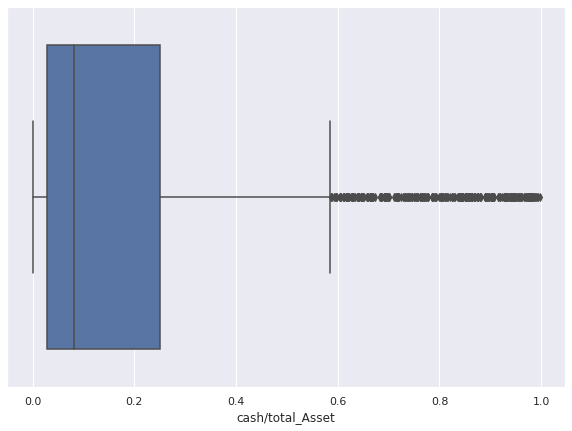

In [ ]:
sns.boxplot(x='cash/total_Asset', data=finan_ratio)

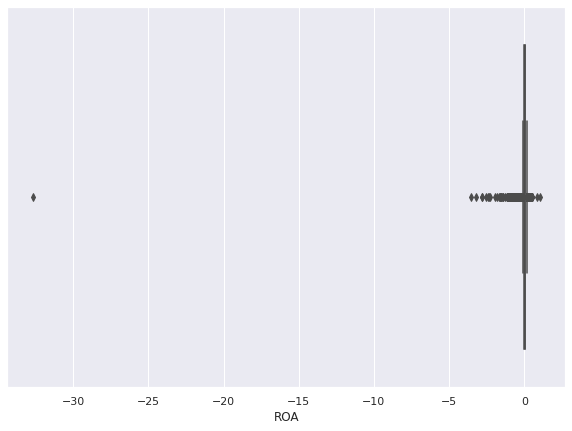

In [ ]:
sns.boxplot(x='ROA', data=finan_ratio)

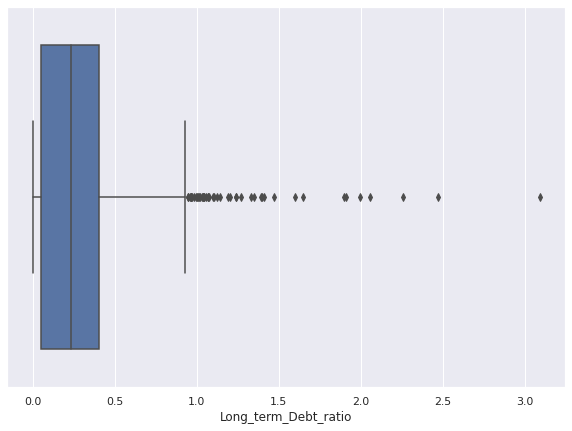

In [ ]:
sns.boxplot(x='Long_term_Debt_ratio', data=finan_ratio)

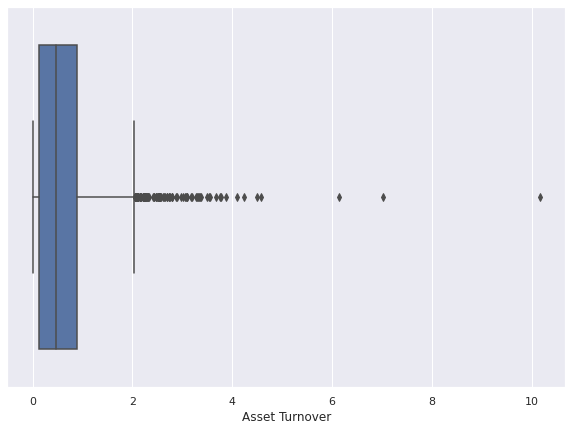

In [ ]:
sns.boxplot(x='Asset Turnover', data=finan_ratio)

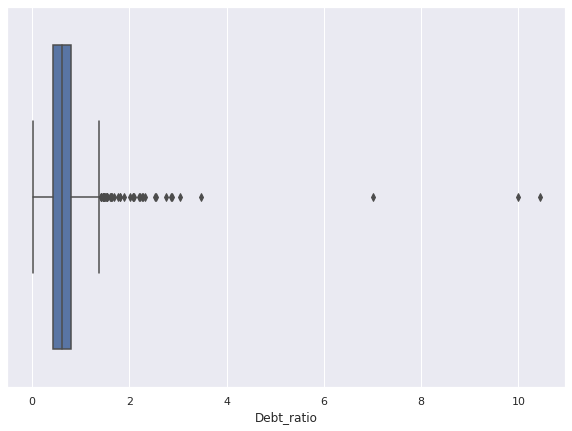

In [ ]:
sns.boxplot(x='Debt_ratio', data=finan_ratio)

Winsorize the new financial ratios 

In [ ]:
finan_ratio['firm_size_w']= winsorize(finan_ratio['firm_size'],limits=[0.01,0.03])
finan_ratio['cash/total_Asset_w']= winsorize(finan_ratio['cash/total_Asset'],limits=[0.00,0.08])
finan_ratio['ROA_w']= winsorize(finan_ratio['ROA'],limits=[0.09,0.04])
finan_ratio['Long_term_Debt_ratio_w']= winsorize(finan_ratio['Long_term_Debt_ratio'],limits=[0.00,0.05])
finan_ratio['Debt_ratio_w']= winsorize(finan_ratio['Debt_ratio'],limits=[0.00,0.05])
finan_ratio['Asset Turnover_w']= winsorize(finan_ratio['Asset Turnover'],limits=[0.00,0.05])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Check again the statistics and boxplots of the new financial ratios<br>
The most extreme outliers have been removed from the new financial ratios variables. 

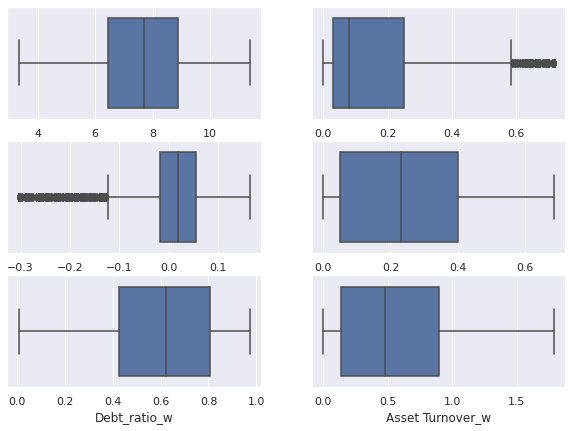

In [ ]:
fig, axs = plt.subplots(3,2)
sns.boxplot(x='firm_size_w', data=finan_ratio, ax=axs[0,0])
sns.boxplot(x='cash/total_Asset_w', data=finan_ratio, ax=axs[0,1])
sns.boxplot(x='ROA_w', data=finan_ratio, ax=axs[1,0])
sns.boxplot(x='Long_term_Debt_ratio_w', data=finan_ratio, ax=axs[1,1])
sns.boxplot(x='Debt_ratio_w', data=finan_ratio, ax=axs[2,0])
sns.boxplot(x='Asset Turnover_w', data=finan_ratio, ax=axs[2,1])

In [ ]:
finan_ratio.describe()

,firm_size,cash/total_Asset,ROA,Long_term_Debt_ratio,Debt_ratio,Asset Turnover,firm_size_w,cash/total_Asset_w,ROA_w,Long_term_Debt_ratio_w,Debt_ratio_w,Asset Turnover_w
count,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000,2839.00000000
mean,7.70155233,0.19825036,-0.05012145,0.26507236,0.62408771,0.62460751,7.68612224,0.18653020,-0.00909393,0.25229067,0.59671898,0.58751643
std,1.93989255,0.25419835,0.66657144,0.25314859,0.41400798,0.65390108,1.84048551,0.22382433,0.12113506,0.20768264,0.24605237,0.51131424
min,-4.19970508,0.00000000,-32.69696970,0.00000000,0.00790791,0.00000000,3.34268511,0.00000000,-0.30318358,0.00000000,0.00790791,0.00000000
25%,6.44406167,0.02870157,-0.01713352,0.04996419,0.42468288,0.13539938,6.44406167,0.02870157,-0.01713352,0.04996419,0.42468288,0.13539938
50%,7.69887545,0.08079307,0.01776426,0.23245095,0.62067714,0.47732217,7.69887545,0.08079307,0.01776426,0.23245095,0.62067714,0.47732217
75%,8.89747718,0.25123039,0.05565694,0.40256822,0.80689890,0.89424068,8.89747718,0.25123039,0.05565694,0.40256822,0.80689890,0.89424068
max,14.80407693,0.99735207,1.02500567,3.09225869,10.43939394,10.15984116,11.37275494,0.71684769,0.16323010,0.68689456,0.97163366,1.78653379


In [ ]:
finan_ratio1 = finan_ratio[['TICKER','firm_size_w','cash/total_Asset_w','ROA_w','Long_term_Debt_ratio_w','Debt_ratio_w','Asset Turnover_w']]

Check correlations among the new financial ratios

In [ ]:
corr=finan_ratio.loc[:,finan_ratio.columns!='TICKER'].corr()
corr

,firm_size,cash/total_Asset,ROA,Long_term_Debt_ratio,Debt_ratio,Asset Turnover,firm_size_w,cash/total_Asset_w,ROA_w,Long_term_Debt_ratio_w,Debt_ratio_w,Asset Turnover_w
firm_size,1.00000000,-0.54523212,0.26652139,0.09317327,0.08931271,-0.08573455,0.99006540,-0.54669330,0.47452917,0.15515003,0.39647209,-0.09418053
cash/total_Asset,-0.54523212,1.00000000,-0.21976765,-0.21501911,-0.23295934,-0.16310900,-0.56298852,0.98979101,-0.60488521,-0.27571395,-0.43201429,-0.19620574
ROA,0.26652139,-0.21976765,1.00000000,0.01804144,-0.44692376,0.09537411,0.21769889,-0.21703215,0.35179116,0.03587894,-0.00198251,0.11265663
Long_term_Debt_ratio,0.09317327,-0.21501911,0.01804144,1.00000000,0.42942545,0.10557932,0.10213598,-0.20571306,0.04469646,0.92609429,0.44818893,0.13739698
Debt_ratio,0.08931271,-0.23295934,-0.44692376,0.42942545,1.00000000,0.02767786,0.15104487,-0.22084362,0.01082483,0.33937333,0.69508160,0.01892774
Asset Turnover,-0.08573455,-0.16310900,0.09537411,0.10557932,0.02767786,1.00000000,-0.08597453,-0.14111025,0.25603536,0.09743075,0.01237208,0.91500446
firm_size_w,0.99006540,-0.56298852,0.21769889,0.10213598,0.15104487,-0.08597453,1.00000000,-0.56489467,0.48407675,0.16738369,0.40922312,-0.09410391
cash/total_Asset_w,-0.54669330,0.98979101,-0.21703215,-0.20571306,-0.22084362,-0.14111025,-0.56489467,1.00000000,-0.58332996,-0.26843553,-0.41973226,-0.17019098
ROA_w,0.47452917,-0.60488521,0.35179116,0.04469646,0.01082483,0.25603536,0.48407675,-0.58332996,1.00000000,0.07992224,0.12831326,0.30598030
Long_term_Debt_ratio_w,0.15515003,-0.27571395,0.03587894,0.92609429,0.33937333,0.09743075,0.16738369,-0.26843553,0.07992224,1.00000000,0.45435785,0.13535289


#### GIC GROUP fixed effects with market ratios and financial ratios  ---     (Most Recommended)

In [ ]:
finan_df_ggroup=pd.merge(new_ggroup,finan_ratio1,on='TICKER')
finan_df_ggroup.head()

,TICKER,RetEarly2020,RetLate2020,ggroup,GGROUP_Automobiles & Components,GGROUP_Banks,GGROUP_Capital Goods,GGROUP_Commercial & Professional Services,GGROUP_Consumer Durables & Apparel,GGROUP_Consumer Services,GGROUP_Diversified Financials,GGROUP_Energy,GGROUP_Food & Staples Retailing,"GGROUP_Food, Beverage & Tobacco",GGROUP_Health Care Equipment & Services,GGROUP_Household & Personal Products,GGROUP_Insurance,GGROUP_Materials,GGROUP_Media & Entertainment,"GGROUP_Pharmaceuticals, Biotechnology & Life Sciences",GGROUP_Real Estate,GGROUP_Retailing,GGROUP_Semiconductors & Semiconductor Equipment,GGROUP_Software & Services,GGROUP_Technology Hardware & Equipment,GGROUP_Telecommunication Services,GGROUP_Transportation,GGROUP_Utilities,Book/Price_w,E/P_w,EBIT/P_w,SALES/P_w,firm_size_w,cash/total_Asset_w,ROA_w,Long_term_Debt_ratio_w,Debt_ratio_w,Asset Turnover_w
0,WLL,-0.90866488,-0.49692366,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60232498,-0.35977053,0.11364951,2.35899826,8.94072360,0.00113295,-0.03157978,0.37296701,0.47294513,0.20706714
1,PVAC,-0.89818751,2.28478423,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.13358814,0.15366226,0.38565916,1.02575964,7.10516083,0.00640105,0.05794352,0.45743114,0.57254248,0.38679716
2,SM,-0.89145885,4.06001766,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60232498,-0.14724661,0.02103096,1.25138710,8.74707114,0.00000159,-0.02971934,0.43799005,0.56311306,0.25257222
3,OVV,-0.88086361,4.46790187,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.60232498,0.03840908,0.12277773,1.10401473,9.97520338,0.00884256,0.01089031,0.37566901,0.53786010,0.31302648
4,TELL,-0.87583792,0.41608360,1010,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.09427008,-0.08607113,-0.08272054,0.01631851,5.94626319,0.18226521,-0.30318358,0.21558529,0.56506557,0.07526117


##### RetEarly2020

In [ ]:
#x = finan_df_ggroup.drop(columns=['TICKER','RetEarly2020','RetLate2020','ggroup','ROA','cash/total_Asset','firm_size','Fixed Asset Turnover','Long_term_Debt_ratio','SALES/P_w','cash/current_Liabilities'])
x = finan_df_ggroup.drop(columns=['TICKER','RetEarly2020','RetLate2020','ggroup'])
x = sm.add_constant(x)
y = finan_df_ggroup['RetEarly2020']
model_f_00 = sm.OLS(y,x)
results_f_00= model_f_00.fit()
results_f_00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RetEarly2020   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     20.83
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.45e-108
Time:                        22:53:50   Log-Likelihood:                -373.95
No. Observations:                2683   AIC:                             815.9
Df Residuals:                    2649   BIC:                             1016.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -0.0528      0.043     -1.214      0.225      -0.138       0.032
GGROUP_Automobiles & Components                          -0.0942      0.051     -1.848      0.065      -0.194       0.006
GGROUP_Banks                                             -0.0316      0.033     -0.964      0.335      -0.096       0.033
GGROUP_Capital Goods                                     -0.0253      0.019     -1.304      0.192      -0.063       0.013
GGROUP_Commercial & Professional Services                -0.0456      0.031     -1.490      0.136      -0.106       0.014
GGROUP_Consumer Durables & Apparel                       -0.0904      0.031     -2.884      0.004      -0.152      -0.029
GGROUP_Consumer Services                                 -0.1684      0.030     -5.596      0.000      -0.227      -0.109
GGROUP_Diversified Financials                            -0.0067      0.028     -0.239      0.811      -0.061       0.048
GGROUP_Energy                                            -0.2640      0.028     -9.267      0.000      -0.320      -0.208
GGROUP_Food & Staples Retailing                           0.1809      0.061      2.984      0.003       0.062       0.300
GGROUP_Food, Beverage & Tobacco                           0.0974      0.034      2.837      0.005       0.030       0.165
GGROUP_Health Care Equipment & Services                   0.1080      0.022      4.816      0.000       0.064       0.152
GGROUP_Household & Personal Products                      0.0222      0.057      0.390      0.697      -0.090       0.134
GGROUP_Insurance                                          0.0764      0.035      2.177      0.030       0.008       0.145
GGROUP_Materials                                         -0.0382      0.025     -1.497      0.134      -0.088       0.012
GGROUP_Media & Entertainment                             -0.0598      0.032     -1.874      0.061      -0.122       0.003
GGROUP_Pharmaceuticals, Biotechnology & Life Sciences     0.0404      0.025      1.635      0.102      -0.008       0.089
GGROUP_Real Estate                                       -0.0491      0.024     -2.022      0.043      -0.097      -0.001
GGROUP_Retailing                                         -0.0608      0.030     -2.062      0.039      -0.119      -0.003
GGROUP_Semiconductors & Semiconductor Equipment          -0.0193      0.036     -0.540      0.589      -0.089       0.051
GGROUP_Software & Services                                0.0400      0.022      1.811      0.070      -0.003       0.083
GGROUP_Technology Hardware & Equipment                   -0.0311      0.029     -1.072      0.284      -0.088       0.026
GGROUP_Telecommunication Services

In [ ]:
results_f_00.params.sort_values(ascending=False)

ROA_w                                                    0.68454098
GGROUP_Telecommunication Services                        0.20695618
GGROUP_Food & Staples Retailing                          0.18090065
GGROUP_Utilities                                         0.14905375
GGROUP_Health Care Equipment & Services                  0.10797725
GGROUP_Food, Beverage & Tobacco                          0.09736590
GGROUP_Insurance                                         0.07642078
GGROUP_Pharmaceuticals, Biotechnology & Life Sciences    0.04042405
GGROUP_Software & Services                               0.04004846
GGROUP_Household & Personal Products                     0.02221739
cash/total_Asset_w                                       0.01554189
GGROUP_Transportation                                    0.01042921
SALES/P_w                                                0.00468335
Debt_ratio_w                                            -0.00392822
GGROUP_Diversified Financials                   

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= results_f_00.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
GGROUP_Energy,0.00000000,0.00000000,significant,significant
ROA_w,0.00000000,0.00000000,significant,significant
EBIT/P_w,0.00000000,0.00000000,significant,significant
E/P_w,0.00000000,0.00000002,significant,significant
GGROUP_Consumer Services,0.00000002,0.00000075,significant,significant
GGROUP_Health Care Equipment & Services,0.00000155,0.00004652,significant,significant
Book/Price_w,0.00000631,0.00018293,significant,significant
GGROUP_Utilities,0.00001151,0.00032215,significant,significant
GGROUP_Telecommunication Services,0.00064875,0.01751623,significant,significant
GGROUP_Food & Staples Retailing,0.00286986,0.07461645,significant,NaN


Interpretation (RetEeary2020):

When adding market ratios and finacial ratios to the GIC groups fixed effect model,  the model has an adjusted R^2 of 0.196, meaning that 19.6% of the early 2020 return can be explained by this model.  There are an additional of 7.3% of the explainatory power due to the addition of financial ratios.<br><br>

Among all the market and financial ratios, ```ROA```,```EBIT/P```,```E/P```and ```Book/Price``` are statistically significant as explanatory variables. <br>

When we adjusted the p-value based on holm's method, the following financial ratios are not statistically significant: 'SALES/P', firm_size,cash/total_Asset, Long_term_Debt_ratio, Debt_ratio and Asset Turnover. <br><br>

```significant financial ratio varaibles```

* ```"ROA"``` variable has a coefficient of ```0.6845```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "ROA"ratio, the return in early2020 is predicted to increase by 0.06845.<br><br>

* ```"EBIT/P"``` variable has a coefficient of ```-0.5651```. When holding all the other aforementioned financial ratioss constant, when there is a 0.1 unit increase in "EBIT/P" ratio, the return in early2020 is predicted to decrease by 0.05651.<br><br>

* ```"E/P"``` variable has a coefficient of ```-0.4421```. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "E/P" ratio, the return in early2020 is predicted to decrease by 0.04421.<br><br>

* ```"Book/Price"``` variable has a coefficient of ```-0.1061```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "Book/Price" ratio, the return in early2020 is predicted to decrease by 0.01061.<br><br>


```Insignificant financial ratio varaibles```

* 'SALES/P' variable has a coefficient of 0.0047. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "SALES/P" ratio, the return in early2020 is predicted to increase by 0.00047 <br><br>


* 'firm_size' variable has a coefficient of -0.0106. When holding all the other aforementioned financial ratios ratios constant, when there is a 1% increase in "firm_size" ratio, the return in early2020 is predicted to decrease by 0.0106.<br><br>


* 'cash/total_Asset' variable has a coefficient of 0.0155. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "cash/total_Asset" ratio, the return in early2020 is predicted to increase by 0.00155<br><br>

* 'Long_term_Debt_ratio' variable has a coefficient of -0.1222. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "Long_term_Debt_ratio" , the return in early2020 is predicted to decrease by 0.01222.<br><br>


* 'Debt_ratio' variable has a coefficient of -0.0039. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "Debt_ratio" , the return in early2020 is predicted to decrease by 0.00039.<br><br>

* 'Asset Turnover'  has a coefficient of -0.0599. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "Asset Turnover" , the return in early2020 is predicted to decrease by 0.00599.<br><br>




##### RetLate2020

In [ ]:
#x = finan_df_ggroup.drop(columns=['TICKER','RetEarly2020','RetLate2020','ggroup','ROA','cash/total_Asset','firm_size','Fixed Asset Turnover','Long_term_Debt_ratio','SALES/P_w','cash/current_Liabilities'])
x = finan_df_ggroup.drop(columns=['TICKER','RetEarly2020','RetLate2020','ggroup'])
x = sm.add_constant(x)
y = finan_df_ggroup['RetLate2020']
model_f_01 = sm.OLS(y,x)
results_f_01= model_f_01.fit()
results_f_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RetLate2020   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     16.59
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           6.70e-85
Time:                        22:53:50   Log-Likelihood:                -3729.9
No. Observations:                2683   AIC:                             7528.
Df Residuals:                    2649   BIC:                             7728.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                     1.1129      0.152      7.326      0.000       0.815       1.411
GGROUP_Automobiles & Components                           0.9374      0.178      5.263      0.000       0.588       1.287
GGROUP_Banks                                             -0.1441      0.114     -1.260      0.208      -0.368       0.080
GGROUP_Capital Goods                                      0.1606      0.068      2.366      0.018       0.028       0.294
GGROUP_Commercial & Professional Services                -0.1421      0.107     -1.329      0.184      -0.352       0.068
GGROUP_Consumer Durables & Apparel                        0.8004      0.110      7.307      0.000       0.586       1.015
GGROUP_Consumer Services                                  0.3193      0.105      3.036      0.002       0.113       0.525
GGROUP_Diversified Financials                             0.1439      0.097      1.477      0.140      -0.047       0.335
GGROUP_Energy                                             0.2325      0.100      2.336      0.020       0.037       0.428
GGROUP_Food & Staples Retailing                          -0.5859      0.212     -2.767      0.006      -1.001      -0.171
GGROUP_Food, Beverage & Tobacco                          -0.1566      0.120     -1.306      0.192      -0.392       0.079
GGROUP_Health Care Equipment & Services                  -0.1490      0.078     -1.903      0.057      -0.303       0.005
GGROUP_Household & Personal Products                     -0.1013      0.199     -0.509      0.611      -0.492       0.289
GGROUP_Insurance                                         -0.2656      0.123     -2.166      0.030      -0.506      -0.025
GGROUP_Materials                                          0.1018      0.089      1.142      0.253      -0.073       0.276
GGROUP_Media & Entertainment                              0.0685      0.112      0.615      0.539      -0.150       0.287
GGROUP_Pharmaceuticals, Biotechnology & Life Sciences    -0.4608      0.086     -5.337      0.000      -0.630      -0.292
GGROUP_Real Estate                                       -0.2255      0.085     -2.658      0.008      -0.392      -0.059
GGROUP_Retailing                                          0.8457      0.103      8.204      0.000       0.644       1.048
GGROUP_Semiconductors & Semiconductor Equipment           0.5284      0.125      4.242      0.000       0.284       0.773
GGROUP_Software & Services                                0.1862      0.077      2.410      0.016       0.035       0.338
GGROUP_Technology Hardware & Equipment                   -0.0080      0.101     -0.079      0.937      -0.207       0.191
GGROUP_Telecommunication Services

In [ ]:
results_f_01.params.sort_values(ascending=False)

const                                                    1.11287801
GGROUP_Automobiles & Components                          0.93735326
GGROUP_Retailing                                         0.84567558
GGROUP_Consumer Durables & Apparel                       0.80035620
GGROUP_Semiconductors & Semiconductor Equipment          0.52840991
GGROUP_Consumer Services                                 0.31927542
GGROUP_Energy                                            0.23249839
SALES/P_w                                                0.20786897
GGROUP_Software & Services                               0.18620278
GGROUP_Capital Goods                                     0.16060342
GGROUP_Diversified Financials                            0.14394514
Debt_ratio_w                                             0.13629707
Long_term_Debt_ratio_w                                   0.12905801
cash/total_Asset_w                                       0.11556547
GGROUP_Materials                                

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= results_f_01.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
GGROUP_Retailing,0.00000000,0.00000000,significant,significant
const,0.00000000,0.00000000,significant,significant
GGROUP_Consumer Durables & Apparel,0.00000000,0.00000000,significant,significant
SALES/P_w,0.00000002,0.00000063,significant,significant
"GGROUP_Pharmaceuticals, Biotechnology & Life Sciences",0.00000010,0.00000319,significant,significant
GGROUP_Automobiles & Components,0.00000015,0.00000458,significant,significant
GGROUP_Semiconductors & Semiconductor Equipment,0.00002289,0.00066380,significant,significant
GGROUP_Utilities,0.00006514,0.00182402,significant,significant
ROA_w,0.00030323,0.00818727,significant,significant
firm_size_w,0.00032369,0.00841601,significant,significant


Interpretation (RetLate2929):

When adding market ratios and finacial ratios to the GIC groups fixed effect model,  the model has an adjusted R^2 of 0.161, meaning that 16.1% of the variances of late 2020 return can be explained by this model.  There are an additional of 5.9% of the explainatory power due to the addition of financial ratios.<br><br>

Among all the market and financial ratios, ```ROA```,```Sales/P```, and```firm_sized``` are statistically significant as explanatory variables.<br>

When we adjusted the p-value based on holm's method, the following financial ratios are not statistically significant: Book/Price, E/P,  EBIT/P, cash/total_Asset, Long_term_Debt_ratio, Debt_ratio and Asset Turnover. <br><br>

```Significant financial ratio variables```

* ```"ROA"``` variable has a coefficient of ```-1.134```. When holding all the other ratios constant and considering the average among industies, when there is a 0.1 unit increase in "ROA"ratio, the return in late2020 is predicted to decrease by 0.1134.<br><br>

* ```"Sales/Price"``` variable has a coefficient of ```0.2079```. When holding all the other ratios constant and considering the average among industies, when there is a 0.1 unit increase in "Book/Price" ratio, the return in late2020 is predicted to increase by 0.02079.<br><br>


* ```"firm_size"``` variable has a coefficient of ```-0.0536```. When holding all the other ratios constant, when there is an 1% increase in "firm_size" ratio, the return in late2020 is predicted to decrease by 0.0536.<br><br>

```insignificant financial ratio variables```

* 'Book/Price' variable has a coefficient of -0.1977. When holding all the other aforementioned financial ratios ratios constant, when there is an 0.1 unit increase in "Book/Price" ratio, the return in early2020 is predicted to decrease by 0.01977 <br><br>


* 'E/P' variable has a coefficient of -0.4991. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "E/P" ratio, the return in early2020 is predicted to decrease by 0.04991.<br><br>

* 'EBIT/P' variable has a coefficient of -0.3877. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "EBIT/P" ratio, the return in early2020 is predicted to decrease by 0.03877.<br><br>

* 'cash/total_Asset' variable has a coefficient of 0.1156. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "cash/total_Asset" ratio, the return in early2020 is predicted to increase by 0.01156<br><br>

* 'Long_term_Debt_ratio' variable has a coefficient of 0.1291. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "Long_term_Debt_ratio" , the return in early2020 is predicted to increase by 0.01291.<br><br>


* 'Debt_ratio' variable has a coefficient of 0.1363. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "Debt_ratio" , the return in early2020 is predicted to increase by 0.01363.<br><br>

* 'Asset Turnover'  has a coefficient of -0.1384. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "Asset Turnover" , the return in early2020 is predicted to decrease by 0.01384.<br><br>







#### SIC fixed effect model with market ratios and financial ratios 

##### RetEarly2020

In [ ]:
finan_df_sic=pd.merge(new_df_SIC,finan_ratio1,on='TICKER')
finan_df_sic.head()

,TICKER,RetEarly2020,RetLate2020,sic,SIC_Business Equipment,SIC_Chemicals & Allied Products,SIC_Consumer Durables,SIC_Consumer Nondurables,SIC_Energy,SIC_Finance,"SIC_Healthcare,Medical Equipment,and Drugs",SIC_Manufacturing,SIC_Others,SIC_Telephone & Television Transmission,SIC_Utilities,"SIC_Wholesale, Retail, and Some Services",Book/Price_w,E/P_w,EBIT/P_w,SALES/P_w,firm_size_w,cash/total_Asset_w,ROA_w,Long_term_Debt_ratio_w,Debt_ratio_w,Asset Turnover_w
0,WLL,-0.90866488,-0.49692366,1311,0,0,0,0,1,0,0,0,0,0,0,0,1.60232498,-0.35977053,0.11364951,2.35899826,8.94072360,0.00113295,-0.03157978,0.37296701,0.47294513,0.20706714
1,PVAC,-0.89818751,2.28478423,1311,0,0,0,0,1,0,0,0,0,0,0,0,1.13358814,0.15366226,0.38565916,1.02575964,7.10516083,0.00640105,0.05794352,0.45743114,0.57254248,0.38679716
2,SM,-0.89145885,4.06001766,1311,0,0,0,0,1,0,0,0,0,0,0,0,1.60232498,-0.14724661,0.02103096,1.25138710,8.74707114,0.00000159,-0.02971934,0.43799005,0.56311306,0.25257222
3,OVV,-0.88086361,4.46790187,1311,0,0,0,0,1,0,0,0,0,0,0,0,1.60232498,0.03840908,0.12277773,1.10401473,9.97520338,0.00884256,0.01089031,0.37566901,0.53786010,0.31302648
4,TELL,-0.87583792,0.41608360,1311,0,0,0,0,1,0,0,0,0,0,0,0,0.09427008,-0.08607113,-0.08272054,0.01631851,5.94626319,0.18226521,-0.30318358,0.21558529,0.56506557,0.07526117


In [ ]:
#x = finan_df_sic.drop(columns=['TICKER','RetEarly2020','RetLate2020','sic','Fixed Asset Turnover','cash/current_Liabilities','cash/total_Asset','ROA','Long_term_Debt_ratio','RD/Asset','Book/Price_w','EBIT/P_w'])
x = finan_df_sic.drop(columns=['TICKER','RetEarly2020','RetLate2020','sic'])
x = sm.add_constant(x)
y = finan_df_sic['RetEarly2020']
model_f_30 = sm.OLS(y,x)
results_f_30= model_f_30.fit()
results_f_30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RetEarly2020   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     27.23
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.33e-96
Time:                        22:53:50   Log-Likelihood:                -423.63
No. Observations:                2659   AIC:                             891.3
Df Residuals:                    2637   BIC:                             1021.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.1016      0.042     -2.434      0.015      -0.183      -0.020
SIC_Business Equipment                         0.0390      0.016      2.417      0.016       0.007       0.071
SIC_Chemicals & Allied Products               -0.0517      0.034     -1.524      0.128      -0.118       0.015
SIC_Consumer Durables                         -0.0746      0.036     -2.071      0.038      -0.145      -0.004
SIC_Consumer Nondurables                       0.0098      0.026      0.371      0.710      -0.042       0.062
SIC_Energy                                    -0.2827      0.033     -8.672      0.000      -0.347      -0.219
SIC_Finance                                    0.0034      0.017      0.199      0.842      -0.030       0.037
SIC_Healthcare,Medical Equipment,and Drugs     0.0850      0.021      4.117      0.000       0.045       0.126
SIC_Manufacturing                             -0.0237      0.019     -1.225      0.221      -0.062       0.014
SIC_Others                                    -0.0266      0.018     -1.492      0.136      -0.062       0.008
SIC_Telephone & Television Transmission        0.1146      0.040      2.844      0.004       0.036       0.194
SIC_Utilities                                  0.1395      0.032      4.304      0.000       0.076       0.203
SIC_Wholesale, Retail, and Some Services      -0.0335      0.023     -1.460      0.144      -0.079       0.012
Book/Price_w                                  -0.1240      0.023     -5.287      0.000      -0.170      -0.078
E/P_w                                         -0.4430      0.072     -6.142      0.000      -0.584      -0.302
EBIT/P_w                                      -0.5674      0.081     -6.975      0.000      -0.727      -0.408
SALES/P_w                                      0.0075      0.011      0.700      0.484      -0.013       0.028
firm_size_w                                   -0.0060      0.004     -1.414      0.157      -0.014       0.002
cash/total_Asset_w                            -0.0086      0.043     -0.200      0.842      -0.092       0.075
ROA_w                                          0.6456      0.091      7.102      0.000       0.467       0.824
Long_term_Debt_ratio_w                        -0.1782      0.035     -5.093      0.000      -0.247      -0.110
Debt_ratio_w                                   0.0046      0.033      0.138      0.890      -0.060       0.069
Asset Turnover_w                              -0.0388      0.021     -1.835      0.067      -0.080       0.003
==============================================================================
Omnibus:                     4137.604   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000  

In [ ]:
results_f_30.params.sort_values(ascending=False)

ROA_w                                         0.64557353
SIC_Utilities                                 0.13945594
SIC_Telephone & Television Transmission       0.11463925
SIC_Healthcare,Medical Equipment,and Drugs    0.08502045
SIC_Business Equipment                        0.03897738
SIC_Consumer Nondurables                      0.00982700
SALES/P_w                                     0.00747580
Debt_ratio_w                                  0.00456832
SIC_Finance                                   0.00340939
firm_size_w                                  -0.00602551
cash/total_Asset_w                           -0.00855369
SIC_Manufacturing                            -0.02368934
SIC_Others                                   -0.02664807
SIC_Wholesale, Retail, and Some Services     -0.03354506
Asset Turnover_w                             -0.03883023
SIC_Chemicals & Allied Products              -0.05168430
SIC_Consumer Durables                        -0.07463406
const                          

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= results_f_30.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
SIC_Energy,0.00000000,0.00000000,significant,significant
ROA_w,0.00000000,0.00000000,significant,significant
EBIT/P_w,0.00000000,0.00000000,significant,significant
E/P_w,0.00000000,0.00000002,significant,significant
Book/Price_w,0.00000013,0.00000255,significant,significant
Long_term_Debt_ratio_w,0.00000038,0.00000679,significant,significant
SIC_Utilities,0.00001736,0.00029517,significant,significant
"SIC_Healthcare,Medical Equipment,and Drugs",0.00003956,0.00063302,significant,significant
SIC_Telephone & Television Transmission,0.00448753,0.06731292,significant,NaN
const,0.01500290,0.21004064,significant,NaN


Interpretation (RetEeary2020):

When adding market ratios and finacial ratios to the SIC(Farma Frech 12 industry) fixed effect model,  the model has an adjusted R^2 of 0.172, meaning that 17.2% of the early 2020 return can be explained by this model.  There are an additional of 7.4% of the explainatory power due to the addition of financial ratios.<br><br>

Among all the market and financial ratios, ```ROA```,```EBIT/P```,```E/P``` ```Book/Price``` ,and ```Long_term_Debt_ratio```are statistically significant as explanatory variables. <br>

When we adjusted the p-value based on holm's method, the following financial ratios are not statistically significant: 'SALES/P', firm_size,cash/total_Asset, Debt_ratio and Asset Turnover. <br><br>

* ```"ROA"``` variable has a coefficient of ```0.6456```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "ROA"ratio, the return in early2020 is predicted to increase by 0.06456.<br><br>

* ```"EBIT/P"``` variable has a coefficient of ```-0.5674```. When holding all the other aforementioned financial ratioss constant, when there is a 0.1 unit increase in "EBIT/P" ratio, the return in early2020 is predicted to decrease by 0.05674.<br><br>

* ```"E/P"``` variable has a coefficient of ```-0.4430```. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "E/P" ratio, the return in early2020 is predicted to decrease by 0.04430.<br><br>

* ```"Book/Price"``` variable has a coefficient of ```-0.1240```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "Book/Price" ratio, the return in early2020 is predicted to decrease by 0.0124.<br><br>


* ```"Long_term_Debt_ratio"``` variable has a coefficient of ```-0.1782```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "Long_term_Debt_rati", the return in early2020 is predicted to decrease by 0.01782.<br><br>



##### RetLate2020

In [ ]:
#x = finan_df_sic.drop(columns=['TICKER','RetEarly2020','RetLate2020','sic','Fixed Asset Turnover','cash/current_Liabilities','cash/total_Asset','ROA','Long_term_Debt_ratio','RD/Asset','Book/Price_w','EBIT/P_w'])
x = finan_df_sic.drop(columns=['TICKER','RetEarly2020','RetLate2020','sic'])
x = sm.add_constant(x)
y = finan_df_sic['RetLate2020']
model_f_31 = sm.OLS(y,x)
results_f_31= model_f_31.fit()
results_f_31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RetLate2020   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     19.21
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           5.96e-67
Time:                        22:53:50   Log-Likelihood:                -3764.8
No. Observations:                2659   AIC:                             7574.
Df Residuals:                    2637   BIC:                             7703.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.0147      0.147      6.919      0.000       0.727       1.302
SIC_Business Equipment                         0.2864      0.057      5.055      0.000       0.175       0.397
SIC_Chemicals & Allied Products                0.1806      0.119      1.516      0.130      -0.053       0.414
SIC_Consumer Durables                          0.7347      0.127      5.804      0.000       0.486       0.983
SIC_Consumer Nondurables                       0.0718      0.093      0.773      0.440      -0.110       0.254
SIC_Energy                                     0.3039      0.115      2.653      0.008       0.079       0.528
SIC_Finance                                   -0.1061      0.060     -1.764      0.078      -0.224       0.012
SIC_Healthcare,Medical Equipment,and Drugs    -0.3481      0.073     -4.798      0.000      -0.490      -0.206
SIC_Manufacturing                              0.1542      0.068      2.269      0.023       0.021       0.287
SIC_Others                                     0.0636      0.063      1.013      0.311      -0.060       0.187
SIC_Telephone & Television Transmission       -0.2878      0.142     -2.032      0.042      -0.565      -0.010
SIC_Utilities                                 -0.3652      0.114     -3.208      0.001      -0.588      -0.142
SIC_Wholesale, Retail, and Some Services       0.3266      0.081      4.047      0.000       0.168       0.485
Book/Price_w                                  -0.1121      0.082     -1.360      0.174      -0.274       0.049
E/P_w                                         -0.4636      0.253     -1.829      0.067      -0.961       0.033
EBIT/P_w                                      -0.1628      0.286     -0.570      0.569      -0.723       0.398
SALES/P_w                                      0.2035      0.038      5.427      0.000       0.130       0.277
firm_size_w                                   -0.0621      0.015     -4.152      0.000      -0.091      -0.033
cash/total_Asset_w                             0.2593      0.150      1.726      0.085      -0.035       0.554
ROA_w                                         -0.9570      0.319     -2.997      0.003      -1.583      -0.331
Long_term_Debt_ratio_w                         0.2613      0.123      2.125      0.034       0.020       0.502
Debt_ratio_w                                   0.1601      0.116      1.377      0.169      -0.068       0.388
Asset Turnover_w                              -0.0892      0.074     -1.200      0.230      -0.235       0.057
==============================================================================
Omnibus:                     2799.202   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000  

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= results_f_31.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
const,0.00000000,0.00000000,significant,significant
SIC_Consumer Durables,0.00000001,0.00000016,significant,significant
SALES/P_w,0.00000006,0.00000131,significant,significant
SIC_Business Equipment,0.00000046,0.00000920,significant,significant
"SIC_Healthcare,Medical Equipment,and Drugs",0.00000169,0.00003220,significant,significant
firm_size_w,0.00003405,0.00061282,significant,significant
"SIC_Wholesale, Retail, and Some Services",0.00005345,0.00090872,significant,significant
SIC_Utilities,0.00135210,0.02163359,significant,significant
ROA_w,0.00275501,0.04132520,significant,significant
SIC_Energy,0.00802006,0.11228081,significant,NaN


In [ ]:
results_f_31.params.sort_values(ascending=False)

const                                         1.01473091
SIC_Consumer Durables                         0.73470469
SIC_Wholesale, Retail, and Some Services      0.32661079
SIC_Energy                                    0.30389514
SIC_Business Equipment                        0.28639059
Long_term_Debt_ratio_w                        0.26127398
cash/total_Asset_w                            0.25931428
SALES/P_w                                     0.20354205
SIC_Chemicals & Allied Products               0.18064508
Debt_ratio_w                                  0.16014023
SIC_Manufacturing                             0.15416344
SIC_Consumer Nondurables                      0.07184639
SIC_Others                                    0.06356757
firm_size_w                                  -0.06214076
Asset Turnover_w                             -0.08923517
SIC_Finance                                  -0.10607850
Book/Price_w                                 -0.11207756
EBIT/P_w                       

Interpretation (RetLate2929):

When adding market ratios and finacial ratios to the GIC groups fixed effect model,  the model has an adjusted R^2 of 0.126, meaning that 12.6% of the variances of late 2020 return can be explained by this model.  There are an additional of 6.1% of the explainatory power due to the addition of financial ratios.<br><br>

Among all the market and financial ratios, ```ROA```,```Sales/P```, and```firm_sized``` are statistically significant as explanatory variables.<br>

When we adjusted the p-value based on holm's method, the following financial ratios are not statistically significant: Book/Price, E/P,  EBIT/P, cash/total_Asset, Long_term_Debt_ratio, Debt_ratio and Asset Turnover. <br><br>

* ```"ROA"``` variable has a coefficient of ```-0.957```. When holding all the other ratios constant, when there is a 0.1 unit increase in "ROA"ratio, the return in early2020 is predicted to decrease by 0.0957.<br><br>

* ```"Sales/Price"``` variable has a coefficient of ```0.2035```. When holding all the other ratios constant, when there is a 0.1 unit increase in "Book/Price" ratio, the return in early2020 is predicted to increase by 0.02035.<br><br>

* ```"firm_size"``` variable has a coefficient of ```-0.0621```. When holding all the other ratios constant, when there is a 1% increase in "firm_size" ratio, the return in early2020 is predicted to decrease by 0.0621.<br><br>





In [ ]:
finan_df_sic[['firm_size_w']].describe()

,firm_size_w
count,2659.00000000
mean,7.78836715
std,1.78758524
min,3.34268511
25%,6.59466630
50%,7.77070388
75%,8.97244903
max,11.37275494


#### GIC Setors fixed effect model with market ratios and financial ratios

##### RetEarly2020

In [ ]:
finan_df_gsector=pd.merge(new_df_GSECTOR ,finan_ratio1,on='TICKER')
finan_df_gsector.head()

,TICKER,RetEarly2020,RetLate2020,gsector,Gsector_Communication Services,Gsector_Consumer Discretionary,Gsector_Consumer Staples,Gsector_Energy,Gsector_Financials,Gsector_Health Care,Gsector_Industrials,Gsector_Information Technology,Gsector_Materials,Gsector_Real Estate,Gsector_Utilities,Book/Price_w,E/P_w,EBIT/P_w,SALES/P_w,firm_size_w,cash/total_Asset_w,ROA_w,Long_term_Debt_ratio_w,Debt_ratio_w,Asset Turnover_w
0,WLL,-0.90866488,-0.49692366,10,0,0,0,1,0,0,0,0,0,0,0,1.60232498,-0.35977053,0.11364951,2.35899826,8.94072360,0.00113295,-0.03157978,0.37296701,0.47294513,0.20706714
1,PVAC,-0.89818751,2.28478423,10,0,0,0,1,0,0,0,0,0,0,0,1.13358814,0.15366226,0.38565916,1.02575964,7.10516083,0.00640105,0.05794352,0.45743114,0.57254248,0.38679716
2,SM,-0.89145885,4.06001766,10,0,0,0,1,0,0,0,0,0,0,0,1.60232498,-0.14724661,0.02103096,1.25138710,8.74707114,0.00000159,-0.02971934,0.43799005,0.56311306,0.25257222
3,OVV,-0.88086361,4.46790187,10,0,0,0,1,0,0,0,0,0,0,0,1.60232498,0.03840908,0.12277773,1.10401473,9.97520338,0.00884256,0.01089031,0.37566901,0.53786010,0.31302648
4,TELL,-0.87583792,0.41608360,10,0,0,0,1,0,0,0,0,0,0,0,0.09427008,-0.08607113,-0.08272054,0.01631851,5.94626319,0.18226521,-0.30318358,0.21558529,0.56506557,0.07526117


In [ ]:
x=finan_df_gsector.drop(columns=['TICKER','RetEarly2020','RetLate2020','gsector'])
x = sm.add_constant(x)
y=finan_df_gsector['RetEarly2020']

model_f_20 = sm.OLS(y,x)
results_f_20= model_f_20.fit()
results_f_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RetEarly2020   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     31.79
Date:                Wed, 07 Jul 2021   Prob (F-statistic):          2.17e-108
Time:                        22:53:50   Log-Likelihood:                -396.12
No. Observations:                2683   AIC:                             834.2
Df Residuals:                    2662   BIC:                             958.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0828      0.041     -2.039      0.042      -0.162      -0.003
Gsector_Communication Services     0.0050      0.027      0.182      0.856      -0.049       0.059
Gsector_Consumer Discretionary    -0.1070      0.018     -5.835      0.000      -0.143      -0.071
Gsector_Consumer Staples           0.0951      0.027      3.563      0.000       0.043       0.147
Gsector_Energy                    -0.2596      0.027     -9.498      0.000      -0.313      -0.206
Gsector_Financials                 0.0165      0.023      0.721      0.471      -0.028       0.061
Gsector_Health Care                0.0816      0.018      4.572      0.000       0.047       0.117
Gsector_Industrials               -0.0245      0.016     -1.526      0.127      -0.056       0.007
Gsector_Information Technology     0.0199      0.017      1.205      0.228      -0.013       0.052
Gsector_Materials                 -0.0366      0.025     -1.492      0.136      -0.085       0.012
Gsector_Real Estate               -0.0362      0.022     -1.613      0.107      -0.080       0.008
Gsector_Utilities                  0.1629      0.032      5.074      0.000       0.100       0.226
Book/Price_w                      -0.1078      0.023     -4.598      0.000      -0.154      -0.062
E/P_w                             -0.4288      0.071     -6.063      0.000      -0.567      -0.290
EBIT/P_w                          -0.5937      0.082     -7.281      0.000      -0.754      -0.434
SALES/P_w                          0.0110      0.010      1.058      0.290      -0.009       0.031
firm_size_w                       -0.0083      0.004     -1.981      0.048      -0.017    -8.6e-05
cash/total_Asset_w                 0.0056      0.042      0.132      0.895      -0.077       0.088
ROA_w                              0.6835      0.089      7.646      0.000       0.508       0.859
Long_term_Debt_ratio_w            -0.1080      0.043     -2.540      0.011      -0.191      -0.025
Debt_ratio_w                      -0.0245      0.039     -0.625      0.532      -0.101       0.052
Asset Turnover_w                  -0.0432      0.021     -2.092      0.037      -0.084      -0.003
==============================================================================
Omnibus:                     4231.044   Durbin-Watson:                   0.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4787352.616
Skew:                           9.608   Prob(JB):                         0.00
Kurtosis:                     209.045   Cond. No.                     1.72e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 

In [ ]:
results_f_20.params.sort_values(ascending=False)

ROA_w                             0.68346646
Gsector_Utilities                 0.16294886
Gsector_Consumer Staples          0.09512658
Gsector_Health Care               0.08159487
Gsector_Information Technology    0.01992691
Gsector_Financials                0.01652917
SALES/P_w                         0.01100555
cash/total_Asset_w                0.00556299
Gsector_Communication Services    0.00499329
firm_size_w                      -0.00830378
Debt_ratio_w                     -0.02447167
Gsector_Industrials              -0.02449516
Gsector_Real Estate              -0.03616453
Gsector_Materials                -0.03662801
Asset Turnover_w                 -0.04321841
const                            -0.08275767
Gsector_Consumer Discretionary   -0.10695479
Book/Price_w                     -0.10778936
Long_term_Debt_ratio_w           -0.10799857
Gsector_Energy                   -0.25963485
E/P_w                            -0.42880754
EBIT/P_w                         -0.59366917
dtype: flo

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= results_f_20.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
Gsector_Energy,0.00000000,0.00000000,significant,significant
ROA_w,0.00000000,0.00000000,significant,significant
EBIT/P_w,0.00000000,0.00000000,significant,significant
E/P_w,0.00000000,0.00000003,significant,significant
Gsector_Consumer Discretionary,0.00000001,0.00000011,significant,significant
Gsector_Utilities,0.00000042,0.00000710,significant,significant
Book/Price_w,0.00000446,0.00007134,significant,significant
Gsector_Health Care,0.00000506,0.00007595,significant,significant
Gsector_Consumer Staples,0.00037268,0.00521748,significant,significant
Long_term_Debt_ratio_w,0.01112832,0.14466812,significant,NaN



Interpretation (RetEeary2020):

When adding market ratios and finacial ratios to the GIC Sector fixed effect model,  the model has an adjusted R^2 of 0.187, meaning that 18.7% of the early 2020 return can be explained by this model.  There are an additional of 7.1% of the explainatory power due to the addition of financial ratios.<br><br>

Among all the market and financial ratios, ```ROA```,```EBIT/P```,```E/P```and ```Book/Price``` are statistically significant as explanatory variables. <br>

When we adjusted the p-value based on holm's method, the following financial ratios are not statistically significant: 'SALES/P', firm_size,cash/total_Asset, Long_term_Debt_ratio, Debt_ratio and Asset Turnover. <br><br>

* ```"ROA"``` variable has a coefficient of ```0.6835```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "ROA"ratio, the return in early2020 is predicted to increase by 0.06835.<br><br>

* ```"EBIT/P"``` variable has a coefficient of ```-0.5937```. When holding all the other aforementioned financial ratioss constant, when there is a 0.1 unit increase in "EBIT/P" ratio, the return in early2020 is predicted to decrease by 0.05937.<br><br>

* ```"E/P"``` variable has a coefficient of ```-0.4288```. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "E/P" ratio, the return in early2020 is predicted to decrease by 0.04288.<br><br>

* ```"Book/Price"``` variable has a coefficient of ```-0.1078```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "Book/Price" ratio, the return in early2020 is predicted to decrease by 0.01078.<br><br>


##### RetLate2020

In [ ]:
x=finan_df_gsector.drop(columns=['TICKER','RetEarly2020','RetLate2020','gsector'])
x = sm.add_constant(x)
y=finan_df_gsector['RetLate2020']

model_f_21 = sm.OLS(y,x)
results_f_21= model_f_21.fit()
results_f_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RetLate2020   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     23.89
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           6.16e-81
Time:                        22:53:51   Log-Likelihood:                -3760.4
No. Observations:                2683   AIC:                             7563.
Df Residuals:                    2662   BIC:                             7687.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              1.0030      0.142      7.052      0.000       0.724       1.282
Gsector_Communication Services     0.0630      0.096      0.655      0.512      -0.125       0.251
Gsector_Consumer Discretionary     0.7625      0.064     11.872      0.000       0.637       0.888
Gsector_Consumer Staples          -0.1669      0.094     -1.784      0.075      -0.350       0.017
Gsector_Energy                     0.3211      0.096      3.352      0.001       0.133       0.509
Gsector_Financials                 0.0844      0.080      1.051      0.294      -0.073       0.242
Gsector_Health Care               -0.2114      0.063     -3.379      0.001      -0.334      -0.089
Gsector_Industrials                0.1366      0.056      2.428      0.015       0.026       0.247
Gsector_Information Technology     0.3031      0.058      5.229      0.000       0.189       0.417
Gsector_Materials                  0.1846      0.086      2.145      0.032       0.016       0.353
Gsector_Real Estate               -0.1255      0.079     -1.597      0.110      -0.280       0.029
Gsector_Utilities                 -0.3485      0.113     -3.097      0.002      -0.569      -0.128
Book/Price_w                      -0.2041      0.082     -2.485      0.013      -0.365      -0.043
E/P_w                             -0.6448      0.248     -2.602      0.009      -1.131      -0.159
EBIT/P_w                          -0.1563      0.286     -0.547      0.584      -0.717       0.404
SALES/P_w                          0.1917      0.036      5.258      0.000       0.120       0.263
firm_size_w                       -0.0489      0.015     -3.329      0.001      -0.078      -0.020
cash/total_Asset_w                 0.0772      0.148      0.523      0.601      -0.212       0.367
ROA_w                             -1.0395      0.313     -3.319      0.001      -1.654      -0.425
Long_term_Debt_ratio_w             0.2450      0.149      1.645      0.100      -0.047       0.537
Debt_ratio_w                      -0.0413      0.137     -0.301      0.764      -0.310       0.228
Asset Turnover_w                  -0.0611      0.072     -0.844      0.399      -0.203       0.081
==============================================================================
Omnibus:                     2832.381   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           335700.462
Skew:                           5.004   Prob(JB):                         0.00
Kurtosis:                      56.877   Cond. No.                     1.72e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 

In [ ]:
results_f_21.params.sort_values(ascending=False)

const                             1.00299503
Gsector_Consumer Discretionary    0.76249536
Gsector_Energy                    0.32111528
Gsector_Information Technology    0.30305545
Long_term_Debt_ratio_w            0.24503298
SALES/P_w                         0.19169922
Gsector_Materials                 0.18456931
Gsector_Industrials               0.13656454
Gsector_Financials                0.08441048
cash/total_Asset_w                0.07715347
Gsector_Communication Services    0.06296416
Debt_ratio_w                     -0.04129944
firm_size_w                      -0.04888013
Asset Turnover_w                 -0.06107391
Gsector_Real Estate              -0.12546613
EBIT/P_w                         -0.15632640
Gsector_Consumer Staples         -0.16685870
Book/Price_w                     -0.20409924
Gsector_Health Care              -0.21136093
Gsector_Utilities                -0.34849378
E/P_w                            -0.64483094
ROA_w                            -1.03953214
dtype: flo

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= results_f_21.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue

,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
Gsector_Consumer Discretionary,0.00000000,0.00000000,significant,significant
const,0.00000000,0.00000000,significant,significant
SALES/P_w,0.00000016,0.00000314,significant,significant
Gsector_Information Technology,0.00000018,0.00000348,significant,significant
Gsector_Health Care,0.00073666,0.01325996,significant,significant
Gsector_Energy,0.00081255,0.01381329,significant,significant
firm_size_w,0.00088497,0.01415947,significant,significant
ROA_w,0.00091543,0.01415947,significant,significant
Gsector_Utilities,0.00197792,0.02769085,significant,significant
E/P_w,0.00932389,0.12121054,significant,NaN


Interpretation (RetLate2929):

When adding market ratios and finacial ratios to the GIC groups fixed effect model,  the model has an adjusted R^2 of 0.146, meaning that 14.6% of the variances of late 2020 return can be explained by this model.  There are an additional of 5.5% of the explainatory power due to the addition of financial ratios.<br><br>

Among all the market and financial ratios, ```ROA```,```Sales/P```, and```firm_sized``` are statistically significant as explanatory variables.<br>

When we adjusted the p-value based on holm's method, the following financial ratios are not statistically significant: Book/Price, E/P,  EBIT/P, cash/total_Asset, Long_term_Debt_ratio, Debt_ratio and Asset Turnover. <br><br>

* ```"ROA"``` variable has a coefficient of ```-1.0395```. When holding all the other ratios constant and considering the average among industies, when there is a 0.1 unit increase in "ROA"ratio, the return in late2020 is predicted to decrease by 0.10395.<br><br>

* ```"Sales/Price"``` variable has a coefficient of ```0.1917```. When holding all the other ratios constant and considering the average among industies, when there is a 0.1 unit increase in "Book/Price" ratio, the return in late2020 is predicted to increase by 0.01917.<br><br>

* ```"firm_size"``` variable has a coefficient of ```-0.0489```. When holding all the other ratios constant, when there is a 1 unit increase in "firm_size" ratio, the return in late2020 is predicted to decrease by 0.0489.<br><br>



#### NACIS fixed effect model with market ratios and financial ratios

##### RetEarly2020

In [ ]:
finan_df_NACIS=pd.merge(new_naics ,finan_ratio1,on='TICKER')
finan_df_NACIS.head()

,TICKER,RetEarly2020,RetLate2020,naics_Administrative and Support and Waste Management and Remediation Services,"naics_Agriculture, Forestry, Fishing and Hunting","naics_Arts, Entertainment, and Recreation",naics_Construction,naics_Educational Services,naics_Finance and Insurance,naics_Health Care and Social Assistance,naics_Information,naics_Manufacturing,naics_Mining,naics_Other,naics_Other Services (except Public Administration),"naics_Professional, Scientific, and Technical Services",naics_Real Estate Rental and Leasing,naics_Retail Trade,naics_Transportation and Warehousing,naics_Utilities,naics_Wholesale Trade,Book/Price_w,E/P_w,EBIT/P_w,SALES/P_w,firm_size_w,cash/total_Asset_w,ROA_w,Long_term_Debt_ratio_w,Debt_ratio_w,Asset Turnover_w
0,WLL,-0.90866488,-0.49692366,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.60232498,-0.35977053,0.11364951,2.35899826,8.94072360,0.00113295,-0.03157978,0.37296701,0.47294513,0.20706714
1,PVAC,-0.89818751,2.28478423,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.13358814,0.15366226,0.38565916,1.02575964,7.10516083,0.00640105,0.05794352,0.45743114,0.57254248,0.38679716
2,SM,-0.89145885,4.06001766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.60232498,-0.14724661,0.02103096,1.25138710,8.74707114,0.00000159,-0.02971934,0.43799005,0.56311306,0.25257222
3,OVV,-0.88086361,4.46790187,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.60232498,0.03840908,0.12277773,1.10401473,9.97520338,0.00884256,0.01089031,0.37566901,0.53786010,0.31302648
4,TELL,-0.87583792,0.41608360,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.09427008,-0.08607113,-0.08272054,0.01631851,5.94626319,0.18226521,-0.30318358,0.21558529,0.56506557,0.07526117


In [ ]:
x=finan_df_NACIS.drop(columns=['TICKER','RetEarly2020','RetLate2020'])
x = sm.add_constant(x)
y=finan_df_NACIS['RetEarly2020']

model_f_40 = sm.OLS(y,x)
results_f_40= model_f_40.fit()
results_f_40.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RetEarly2020   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     21.38
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.15e-93
Time:                        22:53:51   Log-Likelihood:                -419.50
No. Observations:                2683   AIC:                             895.0
Df Residuals:                    2655   BIC:                             1060.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                             -0.0486      0.045     -1.074      0.283      -0.137       0.040
naics_Administrative and Support and Waste Management and Remediation Services    -0.0241      0.043     -0.554      0.579      -0.109       0.061
naics_Agriculture, Forestry, Fishing and Hunting                                   0.1562      0.111      1.404      0.160      -0.062       0.374
naics_Arts, Entertainment, and Recreation                                         -0.1358      0.038     -3.532      0.000      -0.211      -0.060
naics_Construction                                                                -0.0032      0.046     -0.070      0.944      -0.093       0.087
naics_Educational Services                                                         0.0153      0.079      0.193      0.847      -0.140       0.171
naics_Finance and Insurance                                                        0.0313      0.028      1.135      0.256      -0.023       0.085
naics_Health Care and Social Assistance                                            0.0559      0.047      1.182      0.237      -0.037       0.149
naics_Information                                                                  0.0541      0.023      2.322      0.020       0.008       0.100
naics_Manufacturing                                                                0.0038      0.018      0.205      0.838      -0.032       0.040
naics_Mining                                                                      -0.2770      0.035     -7.858      0.000      -0.346      -0.208
naics_Other                                                                        0.0065      0.191      0.034      0.973      -0.369       0.381
naics_Other Services (except Public Administration)                               -0.1724      0.103     -1.674      0.094      -0.374       0.030
naics_Professional, Scientific, and Technical Services                             0.0228      0.036      0.638      0.523      -0.047       0.093
naics_Real Estate Rental and Leasing                                              -0.0236      0.027     -0.885      0.376      -0.076       0.029
naics_Retail Trade                                                                -0.0044      0.033     -0.132      0.895      -0.069       0.060
naics_Transportation and Warehousing                                               0.0153      0.037      0.420      0.674      -0.056       0.087
naics_Utilities                                                                    0.1643      0.036      4.507      0.000       0.093       0.

In [ ]:
results_f_40.params.sort_values(ascending=False)

ROA_w                                                                             0.63249612
naics_Utilities                                                                   0.16431592
naics_Agriculture, Forestry, Fishing and Hunting                                  0.15622624
naics_Wholesale Trade                                                             0.06635973
naics_Health Care and Social Assistance                                           0.05594378
naics_Information                                                                 0.05412525
cash/total_Asset_w                                                                0.04152722
naics_Finance and Insurance                                                       0.03130091
naics_Professional, Scientific, and Technical Services                            0.02278713
naics_Transportation and Warehousing                                              0.01534653
naics_Educational Services                                            

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= results_f_40.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue


,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
naics_Mining,0.00000000,0.00000000,significant,significant
EBIT/P_w,0.00000000,0.00000000,significant,significant
ROA_w,0.00000000,0.00000000,significant,significant
E/P_w,0.00000000,0.00000001,significant,significant
Book/Price_w,0.00000000,0.00000009,significant,significant
naics_Utilities,0.00000687,0.00016480,significant,significant
"naics_Arts, Entertainment, and Recreation",0.00041945,0.00964744,significant,significant
Asset Turnover_w,0.00064618,0.01421602,significant,significant
Long_term_Debt_ratio_w,0.00714727,0.15009266,significant,NaN
naics_Information,0.02031504,0.40630071,significant,NaN


Interpretation (RetEeary2020):

When adding market ratios and finacial ratios to the GIC groups fixed effect model,  the model has an adjusted R^2 of 0.196, meaning that 19.6% of the early 2020 return can be explained by this model.  There are an additional of 7.3% of the explainatory power due to the addition of financial ratios.<br><br>

Among all the market and financial ratios, ```ROA```,```EBIT/P```,```E/P```, ```Book/Price``` and ```Asset Turnover```are statistically significant as explanatory variables. <br>

When we adjusted the p-value based on holm's method, the following financial ratios are not statistically significant: 'SALES/P', firm_size,cash/total_Asset, Long_term_Debt_ratio, Debt_ratio. <br><br>

* ```"ROA"``` variable has a coefficient of ```0.6325```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "ROA"ratio, the return in early2020 is predicted to increase by 0.06325.<br><br>

* ```"EBIT/P"``` variable has a coefficient of ```-0.6122```. When holding all the other aforementioned financial ratioss constant, when there is a 0.1 unit increase in "EBIT/P" ratio, the return in early2020 is predicted to decrease by 0.06122.<br><br>

* ```"E/P"``` variable has a coefficient of ```-0.4542```. When holding all the other aforementioned financial ratios ratios constant, when there is a 0.1 unit increase in "E/P" ratio, the return in early2020 is predicted to decrease by 0.04542.<br><br>

* ```"Book/Price"``` variable has a coefficient of ```-0.1389```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "Book/Price" ratio, the return in early2020 is predicted to decrease by 0.01389.<br><br>

* ```"Asset Turnover"``` variable has a coefficient of ```-0.0715```. When holding all the other aforementioned financial ratios constant, when there is a 0.1 unit increase in "Asset Turnover" ratio, the return in early2020 is predicted to decrease by 0.00715.<br><br>



##### RetLate2020

In [ ]:
x=finan_df_NACIS.drop(columns=['TICKER','RetEarly2020','RetLate2020'])
x = sm.add_constant(x)
y=finan_df_NACIS['RetLate2020']

model_f_41 = sm.OLS(y,x)
results_f_41= model_f_41.fit()
results_f_41.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            RetLate2020   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     13.72
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.38e-57
Time:                        22:53:51   Log-Likelihood:                -3806.6
No. Observations:                2683   AIC:                             7669.
Df Residuals:                    2655   BIC:                             7834.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                              0.8551      0.160      5.351      0.000       0.542       1.168
naics_Administrative and Support and Waste Management and Remediation Services    -0.1236      0.153     -0.806      0.420      -0.424       0.177
naics_Agriculture, Forestry, Fishing and Hunting                                  -0.4747      0.393     -1.208      0.227      -1.246       0.296
naics_Arts, Entertainment, and Recreation                                          0.4464      0.136      3.285      0.001       0.180       0.713
naics_Construction                                                                 0.2902      0.163      1.785      0.074      -0.029       0.609
naics_Educational Services                                                        -0.2722      0.281     -0.969      0.332      -0.823       0.278
naics_Finance and Insurance                                                        0.0320      0.097      0.329      0.743      -0.159       0.223
naics_Health Care and Social Assistance                                            0.2851      0.167      1.704      0.088      -0.043       0.613
naics_Information                                                                  0.2932      0.082      3.559      0.000       0.132       0.455
naics_Manufacturing                                                                0.1519      0.065      2.332      0.020       0.024       0.280
naics_Mining                                                                       0.5646      0.125      4.532      0.000       0.320       0.809
naics_Other                                                                       -0.3911      0.676     -0.579      0.563      -1.716       0.934
naics_Other Services (except Public Administration)                                0.0144      0.364      0.040      0.968      -0.699       0.728
naics_Professional, Scientific, and Technical Services                            -0.0043      0.126     -0.034      0.973      -0.252       0.243
naics_Real Estate Rental and Leasing                                              -0.0318      0.094     -0.336      0.737      -0.217       0.153
naics_Retail Trade                                                                 0.6615      0.116      5.684      0.000       0.433       0.890
naics_Transportation and Warehousing                                              -0.0582      0.129     -0.451      0.652      -0.311       0.195
naics_Utilities                                                                   -0.3248      0.129     -2.521      0.012      -0.577      -0.

In [ ]:
results_f_41.params.sort_values(ascending=False)

const                                                                             0.85511467
naics_Retail Trade                                                                0.66153255
naics_Mining                                                                      0.56461888
naics_Arts, Entertainment, and Recreation                                         0.44640779
naics_Information                                                                 0.29320554
naics_Construction                                                                0.29021003
naics_Health Care and Social Assistance                                           0.28512208
SALES/P_w                                                                         0.18183044
Long_term_Debt_ratio_w                                                            0.17847233
Debt_ratio_w                                                                      0.16682526
naics_Manufacturing                                                   

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

pvalue_list= results_f_41.pvalues.sort_values(ascending=True)
pvalue_df = pd.DataFrame(pvalue_list,columns=['orginial_pvalue'])

pd.options.display.float_format = '{:.8f}'.format
p_adjusted = p_adjust(pvalue_list,method='holm')
p_adjusted = pd.DataFrame(p_adjusted,columns=['p_adjusted'])
p_adjusted.set_index([pvalue_df.index],inplace=True)
compare_pvalue= pd.concat([pvalue_df,p_adjusted],axis=1)
compare_pvalue['orginal_significance']= compare_pvalue['orginial_pvalue'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue['adjusted_significance']= compare_pvalue['p_adjusted'].apply(lambda x: 'significant' if x < 0.05 else 'NaN')
compare_pvalue


,orginial_pvalue,p_adjusted,orginal_significance,adjusted_significance
naics_Retail Trade,0.00000001,0.00000042,significant,significant
const,0.00000009,0.00000266,significant,significant
SALES/P_w,0.00000132,0.00003572,significant,significant
naics_Mining,0.00000611,0.00015883,significant,significant
firm_size_w,0.00014256,0.00356397,significant,significant
naics_Information,0.00037862,0.00908697,significant,significant
"naics_Arts, Entertainment, and Recreation",0.00103486,0.02380189,significant,significant
naics_Utilities,0.01176854,0.25890785,significant,NaN
naics_Manufacturing,0.01974899,0.41472875,significant,NaN
E/P_w,0.04107672,0.82153442,significant,NaN


Interpretation (RetLate2929):

When adding market ratios and finacial ratios to the GIC groups fixed effect model,  the model has an adjusted R^2 of 0.114, meaning that 11.4% of the variances of late 2020 return can be explained by this model.  There are an additional of 4.7% of the explainatory power due to the addition of financial ratios.<br><br>

Among all the market and financial ratios, ```Sales/P```, and```firm_sized``` are statistically significant as explanatory variables.<br>

When we adjusted the p-value based on holm's method, the following financial ratios are not statistically significant: ROA, Book/Price, E/P,  EBIT/P, cash/total_Asset, Long_term_Debt_ratio, Debt_ratio and Asset Turnover. <br><br>


* ```"Sales/Price"``` variable has a coefficient of ```0.1818```. When holding all the other ratios constant and considering the average among industies, when there is a 0.1 unit increase in "Book/Price" ratio, the return in late2020 is predicted to increase by 0.01818.<br><br>

* ```"firm_size"``` variable has a coefficient of ```-0.0570```. When holding all the other ratios constant, when there is an 1% increase in "firm_size" ratio, the return in late2020 is predicted to decrease by 0.0570.<br><br>



#### Summary

The GIC GROUP industry identifier is the most recommended. Combining the GIC Group industry fixed effect with the aforementioned market ratios and financail ratios can explain 19.6% of the variation in early 2020 stock return and 16.1% of the variation in late 2020 stock return.

### Part4: large companies V.S small comapneis analysis
In this part, we will compare the averge return in large-cap companies and small-cap comapneis

* Dow Jones Industrial Average  (30 largest companies)
* S&P 500  (500 largest companeis)
* Russell 2000  (2000 small-capitalization companies.) 
* Nasdaq composite  ( heavily weighted towards companies in the information technology sector) <br><br>


The raw data was attained from yahoofinance.  To understand how did large companeis and small companies (and IT techonology sector) perform in the stock market in 2020, I calculated the monthly returns for each of the above stock market indices and visualize them in line graphs.



In [ ]:
DJ = pd.read_csv("DowJonesIndustrial.csv")
DJ=DJ[['Month','Return']]
DJ_table= DJ.copy()
DJ_table['Index']='Dow Jones'

SP500 = pd.read_csv("SP500.csv")
SP500=SP500[['Month','Return']]
SP500_table= SP500.copy()
SP500_table['Index']='S&P 500'

Russell2000= pd.read_csv("russell2000.csv")
Russell2000=Russell2000[['Month','Return']]
Russell2000_table= Russell2000.copy()
Russell2000_table['Index']='Russell 2000'

Nasda= pd.read_csv("NasdaqComposite.csv")
Nasda=Nasda[['Month','Return']]
Nasda_table= Nasda.copy()
Nasda_table['Index']='Nasda'

Monthly Return for each of the 4 market indices

In [ ]:
display_side_by_side([DJ,SP500,Russell2000,Nasda],['Dow Jones','S&P 500','Russell 2000','Nasda'])

,Month,Return
0,1,-0.009896
1,2,-0.100746
2,3,-0.137438
3,4,0.110806
4,5,0.042611
5,6,0.016931
6,7,0.023842
7,8,0.075742
8,9,-0.022805
9,10,-0.046077


Visualization 

In [ ]:
merge_index1=pd.concat([DJ_table,SP500_table], ignore_index=True)
merge_index2=pd.concat([merge_index1,Russell2000_table], ignore_index=True)
merge_index3=pd.concat([merge_index2,Nasda_table], ignore_index=True)
merge_index3.to_csv('merge_index3.csv')

Text(0.5, 1.0, 'Compare S&P500 and Russell2000 indexes in 2020')

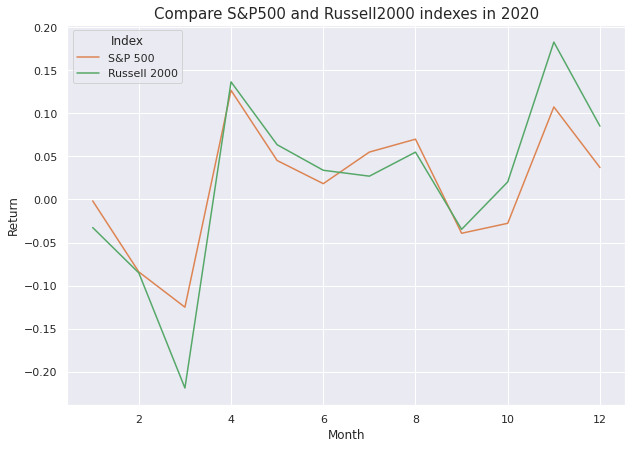

In [ ]:
slice_index= merge_index2[(merge_index2['Index']=='S&P 500') | (merge_index2['Index']=='Russell 2000')]

sns.lineplot(data=slice_index, x="Month", y="Return", hue="Index", ci=None, palette=["C1", "C2"]).set_title("Compare S&P500 and Russell2000 indexes in 2020",fontdict={'fontsize':15})

Text(0.5, 1.0, 'Compare 3 stock market indexes in 2020')

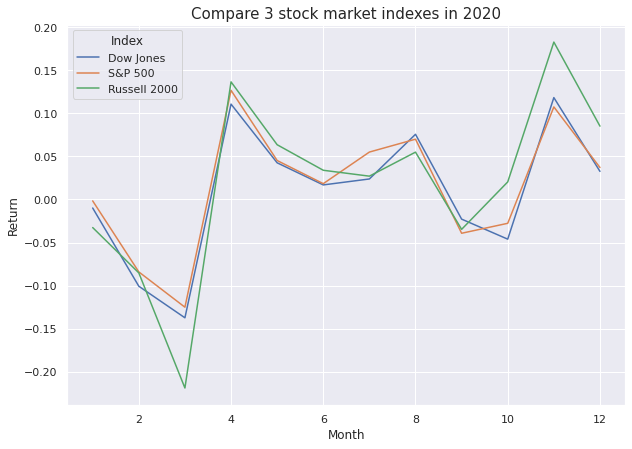

In [ ]:
sns.lineplot(data=merge_index2, x="Month", y="Return", hue="Index").set_title("Compare 3 stock market indexes in 2020",fontdict={'fontsize':15})

Text(0.5, 1.0, 'Compare 4 stock market indexes in 2020')

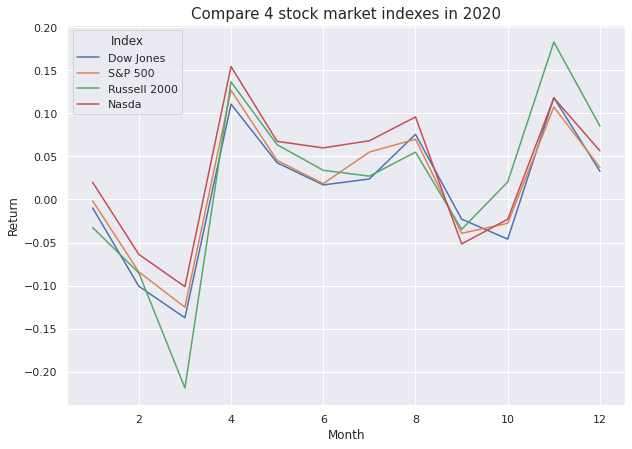

In [ ]:
sns.lineplot(data=merge_index3, x="Month", y="Return", hue="Index").set_title("Compare 4 stock market indexes in 2020",fontdict={'fontsize':15})


Insights:

* The overall U.S stock market trends for each of the 4 stock market indices are quite similar, because these publicly traded companies were all exposed to the similar systematic risk and econimic fluctuation. From January to March, the market indices all  went down. And We can see a major and sudden stock market crash that began in late February and intensified during  March. But after April, the market took a jump from March low and gradually remained stable from May to August. Even though the market had fallen during September and October(due to growing fears of a second COVID-19 infection wave), it rose in the last quarter, finishing 2020 with a postive return. In contrast to the economic downturns during the year of 2020, the recovery of stock market in late 2020 shows us again that the stock markets are forward-looking. 


* Despite the similarity in market trends, it's clear that smaller small-capitalization companies were hard hit the most by the stock market crash in early 2020, as indicated by the Russell2000. While larger companeis seemed to withstand market crash better than the smaller ones. On the other hand, the small-capitalization were also recovering better than the larger companeis in the late 2020. Among the Dow Jones Industrial Average, S&P 500 and Russell 2000,  the Russell2000 had seen more increase amid periods of market recovery.
The small-cap companies were more volatile than the large-cap companeis. 

* Since the nasda composite is heavily weighted towards companies in the information technology sector, we can see the nasda index were performing relatively the best during the year of 2020. It suffered the least from the crash in early 2020, and rise signicantly alongwith the recovery of stock market. It only has a short period of poor performace in around September.
From the industry fixed effect model and above the finding shows us that investors have more confidence towards inforamtion techonology related companies in the covid-19 pandemic. 



### Part5: Texual Analysis(Additional)

In [ ]:
!pip install transformers

In [ ]:
import torch
import transformers as ppb 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
# load the csv files
stock_des = pd.read_csv('stock_des.csv')
stock_des= stock_des.rename(columns={'ticker':'TICKER'})
print(stock_des.shape)
print(temp1.shape)

(2852, 2)
(2711, 3)


In [ ]:
text_df = pd.merge(temp1,stock_des,on='TICKER')
print(text_df.shape)
text_df.head()

(2679, 4)


,TICKER,RetEarly2020,RetLate2020,description
0,WLL,-0.90866488,-0.49692366,"Whiting Petroleum Corporation, an independent ..."
1,PVAC,-0.89818751,2.28478423,"Penn Virginia Corporation, an independent oil ..."
2,SM,-0.89145885,4.06001766,"SM Energy Company, an independent energy compa..."
3,OVV,-0.88086361,4.46790187,"Ovintiv Inc., together with its subsidiaries, ..."
4,TELL,-0.87583792,0.41608360,Tellurian Inc. engages in the natural gas busi...


In [ ]:
text_df['RetEarly2020'].quantile(np.linspace(.1, 1, 9, 0))


0.10000000   -0.57057227
0.20000000   -0.47685624
0.30000000   -0.41186264
0.40000000   -0.36204046
0.50000000   -0.31307887
0.60000000   -0.25549836
0.70000000   -0.20340864
0.80000000   -0.13658902
0.90000000   -0.03925265
Name: RetEarly2020, dtype: float64

In [ ]:
Early_High = len(text_df[text_df['RetEarly2020']>= -0.22])
Early_Low = len(text_df[text_df['RetEarly2020']< -0.22])
print(Early_High/Early_Low)

0.4983221476510067


In [ ]:
textual_df= text_df.copy()
textual_df[['Early_Label']]= textual_df['RetEarly2020'].apply(lambda x: 1 if x>= -0.22 else 0)


In [ ]:
text_df['RetLate2020'].quantile(np.linspace(.1, 1, 9, 0))

0.10000000   0.05076472
0.20000000   0.19595967
0.30000000   0.30972145
0.40000000   0.42654678
0.50000000   0.54856198
0.60000000   0.68788284
0.70000000   0.89070668
0.80000000   1.16251281
0.90000000   1.73981506
Name: RetLate2020, dtype: float64

In [ ]:
Late_High = len(text_df[text_df['RetLate2020']>=0.82])
Late_Low = len(text_df[text_df['RetLate2020']< 0.82])
print(Late_High/Late_Low + Late_High )

898.5042111173498


In [ ]:
textual_df[['Late_Label']]= textual_df['RetLate2020'].apply(lambda x: 1 if x>= 0.82 else 0)


In [ ]:
textual_df['description'] = textual_df['description'].str.slice(0,510)

In [ ]:
textual_df.sample(5)

,TICKER,RetEarly2020,RetLate2020,description,Early_Label,Late_Label
1371,NRC,-0.30709769,-0.06002593,National Research Corporation provides analyti...,0,0
1956,SJW,-0.18277270,0.21883055,"SJW Group, through its subsidiaries, provides ...",1,0
1989,FDBC,-0.17521689,0.28520807,"Fidelity D &amp; D Bancorp, Inc. operates as t...",1,0
1636,CTSH,-0.24801935,0.78165295,"Cognizant Technology Solutions Corporation, a ...",0,0
2545,AMZN,0.05513498,0.67045997,"Amazon.com, Inc. engages in the retail sale of...",1,0


Preparing the predictor and DistilBERT model

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Tokenize the textual data for DistilBERT. 

In [ ]:
tokenized = textual_df['description'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

Pad all lists of tokenized values to the same size. 

In [ ]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [ ]:
np.array(padded).shape

(2679, 159)

In [ ]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(2679, 159)

##### DistilBERT model

We run the pretrained DistilBERT model on the prepared predictor and keep the result in `last_hidden_states` variable. 

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

##### Logistic regression model 

Keep the first layer of the hidden states and assign the outcome variable to `labels`. 

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()
labels_Early = textual_df['Early_Label']

In [ ]:
train_features_Early, test_features_Early, train_labels_Early, test_labels_Early = train_test_split(features, labels_Early,test_size=0.25, random_state=870)

###### Predict HIGH and LOW stock return in Early2020

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features_Early, train_labels_Early)
print(lr_clf.score(test_features_Early, test_labels_Early))

0.7283582089552239


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
y_pred_Early=lr_clf.predict(test_features_Early)

Baseline model

In [ ]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()

scores = cross_val_score(clf, train_features_Early, train_labels_Early)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.556 (+/- 0.05)


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Text(0.5, 257.44, 'Predicted label')

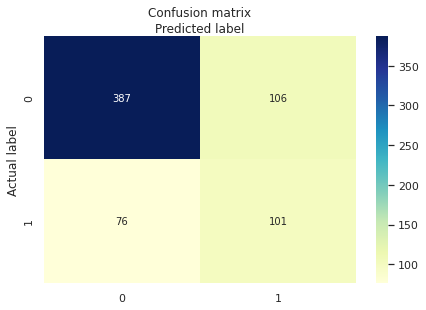

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred_Early, test_labels_Early)
cnf_matrix


%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#3.Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(test_labels_Early, y_pred_Early))
print("Precision:",metrics.precision_score(test_labels_Early, y_pred_Early))
print("Recall:",metrics.recall_score(test_labels_Early, y_pred_Early))
print("Specificity:", 387/(387+106))

Accuracy: 0.7283582089552239
Precision: 0.5706214689265536
Recall: 0.48792270531400966
Specificity: 0.7849898580121704


```Interpretation``` <br>

*(HIGH return or Low return in early 2020)* :<br><br>

The DistilBERT model has an accuracy of 72.8%, which means that the ratio of correct predictions to total predictions made is 72.8%. It has succesfully predicted 387 true lower return companies and 101 true higher return companies based on the companies'business descriptions. But it wrongly classified 106 companeis that have low return to the high return category, and wrongly classified 76 true higher return companeis to the low return category. <br><br>

Overall, the DistilBERT model performs much better than the dummy classfier, which has only an accuray of 55.6%. <br><br>

* (Precision):<br>
The ratio of correct positive predictions to the total predicted positives is  57%.The model correctly predicted 57% of the HIGH return companies out of all the predictive "HIGH return"(1) classes.<br><br>

*  (Recall)<br>
The model correctly identified 49% of the high return companies out of all the true higher return companies.<br><br>

* (Specificity)<br>
The model correctly identified 78% of the low return companies out of all the true lower return companies.<br><br>




###### Predict HIGH and LOW stock return in Late2020

In [ ]:
labels_Late = textual_df['Late_Label']
train_features_Late, test_features_Late, train_labels_Late, test_labels_Late = train_test_split(features, labels_Late,test_size=0.25, random_state=870)
lr_clf_Late = LogisticRegression(max_iter=5000)
lr_clf_Late.fit(train_features_Late, train_labels_Late)
print(lr_clf_Late.score(test_features_Late, test_labels_Late))

0.682089552238806


In [ ]:
y_pred_Late=lr_clf_Late.predict(test_features_Late)

In [ ]:
clf2 = DummyClassifier()

scores2 = cross_val_score(clf2, train_features_Late, train_labels_Late)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

Dummy classifier score: 0.564 (+/- 0.06)


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


Text(0.5, 257.44, 'Predicted label')

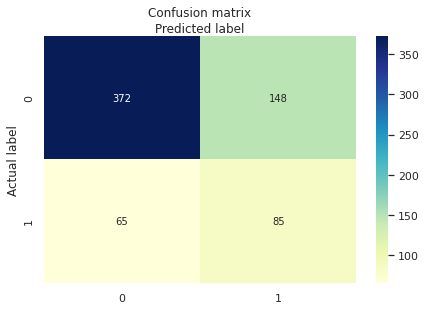

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred_Late, test_labels_Late)
cnf_matrix

%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#3.Evaluation Metrics

print("Accuracy:",metrics.accuracy_score(test_labels_Late, y_pred_Late))
print("Precision:",metrics.precision_score(test_labels_Late, y_pred_Late))
print("Recall:",metrics.recall_score(test_labels_Late, y_pred_Late))
print("Specificity:", 372/(372+148))

Accuracy: 0.682089552238806
Precision: 0.5666666666666667
Recall: 0.3648068669527897
Specificity: 0.7153846153846154


```Interpretation ```<br>

*(HIGH return or Low return in late 2020)* :<br><br>

The DistilBERT model has an accuracy of 68.2%, which means that the ratio of correct predictions to total predictions made is 68.2%. It has succesfully predicted 372 true lower return companies and 85 true higher return companies based on the companies'business descriptions. But it wrongly classified 148 companeis that have low return to the high return category, and wrongly classified 65 true higher return companeis to the low return category. <br><br>

Overall, the DistilBERT model performs much better than the dummy classfier, which has only an accuray of 56.4%. <br><br>

* (Precision):<br>
The ratio of correct positive predictions to the total predicted positives is  57%.The model correctly predicted 57% of the HIGH return companies out of all the predictive "HIGH return"(1) classes.<br><br>

* (Recall)<br>
The model correctly identified 36% of the high return companies out of all the true higher return companies.<br><br>

* (Specificity)<br>
The model correctly identified 71.5% of the low return companies out of all the true lower return companies.<br><br>
